

# **Home Credit Default Risk**
### **Exploratory Data Analysis Notebook**
**Author: Matthew Johnescu**



Table of Contents:
1. [Introduction](#1.-Introduction)

2. [Notebook Imports and Loading Data](#2.-notebook-imports-and-Loading-data)

3. [Description of Data](#3.-description-of-data)
    - [3.1 File Structure Overview](##3.1-File-Structure-Overview)
    - [3.2 Glypse of Data](##3.2-Glypse-of-Data)
        - [3.2.1 Summary of Train and Test Data](###3.2.1-Summary-of-Train-and-Test-Data)
        - [3.2.2 Summary of Bureau Data](###3.2.2-Summary-of-Bureau-Data)
        - [3.2.3 Summary of Bureau Balance Data](###3.2.3-Summary-of-Bureau-Balance-Data)
        - [3.2.4 Summary Card Balance Data](###3.2.4-Summary-of-Credit-Card-Balance-Data)
        - [3.2.5 Summary of Installments Payments Data](###3.2.5-Summary-of-Installments-Payments-Data)
        - [3.2.6 Summary of POS Cash Balnce Data](###3.2.6-Summary-of-POS-Cash-Balnce-Data)
        - [3.2.7 Summary of Previous Application File](###3.2.7-Summary-of-Previous-Application-File)

4. [Analysis of Missing Data](#4.-Analysis-of-Missing-Data)
    - [4.1 Analysis Missing Data in Train File](##4.1-Analysis-of-Missing-Data-in-Train-File)
    - [4.2 Analysis Missing Data in Credit Card Balance File](##4.2-Analysis-of-Missing-Data-in-Credit-Card-Balance-File)
    - [4.3 Analysis Missing Data in Bureau File](##4.3-Analysis-of-Missing-Data-in-Bureau-File)
    - [4.4 Analysis of Missing Data in Bureau Balance File](##4.4-Analysis-of-Missing-Data-in-Bureau-Balance-File)
    - [4.5 Analysis of Missing Data in Installments Payments File](##4.5-Analysis-of-Missing-Data-in-Installments-Payments-File)
    - [4.6 Analysis of Missing Data In POS Cash Balance File:](##4.6-Analysis-of-Missing-Data-In-POS-Cash-Balance-File)
    - [4.7 Analysis of Missing Data in Previous Application File](##4.7-Analysis-of-Missing-Data-in-Previous-Application-File)

5. [Data Cleaning]
6. [Data Exploration]
7. [Summary of Findings]




# 1. Introduction

**Business Problem**

Home Credit faces challenges in accurately predicting loan repayment ability for individuals with limited or no traditional credit history. Many underserved individuals are either rejected or subject to predatory lenders. Home Credit aims to improve its predictive models by leveraging alternative data such as telco and transactional information. 

**Notebook Purpose** 

The purpose of this notebook is to gain an understanding of the dataset and prepare the data set for a predictive model. This will include exploring all data availiable for the project, handling and describing missing data, exploratory analysis of the data, and a summary of findings.

# 2. Notebook Imports and Loading Data

In [131]:
import os
import pandas as pd
import numpy as np
from skimpy import skim

In [132]:
# Specify your folder path:
folder_path = r"C:\Users\johne\Downloads\home-credit-default-risk"

# 3. Description of Data


## 3.1 File Structure Overview

In [133]:
# List and filter CSV files
files = os.listdir(folder_path)
csv_files = [file for file in files if file.endswith('.csv')]

# Display the CSV files
print("Available CSV files:")
for file in csv_files:
    print(file)

Available CSV files:
application_test.csv
application_train.csv
bureau.csv
bureau_balance.csv
credit_card_balance.csv
HomeCredit_columns_description.csv
installments_payments.csv
POS_CASH_balance.csv
previous_application.csv


## 3.2 Summary of Data

### 3.2.1 Summary of Train and Test Data

In [134]:
# Loading application_test.csv
application_test_path = os.path.join(folder_path, "application_test.csv")
try:
    application_test_df = pd.read_csv(application_test_path, encoding='utf-8') # Added throughout import code to account for CSV file loading errors
except UnicodeDecodeError:
    application_test_df = pd.read_csv(application_test_path, encoding='latin1')
print("Displaying the first 5 rows of application_test.csv:")
display(application_test_df.head())  # Neat display

# Loading application_train.csv
application_train_path = os.path.join(folder_path, "application_train.csv")
try:
    application_train_df = pd.read_csv(application_train_path, encoding='utf-8')
except UnicodeDecodeError:
    application_train_df = pd.read_csv(application_train_path, encoding='latin1')
print("\nDisplaying the first 5 rows of application_train.csv:")
display(application_train_df.head())

Displaying the first 5 rows of application_test.csv:


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN



Displaying the first 5 rows of application_train.csv:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Notes on Application Train and Test Files:
- Application Train and Application Test are the two main files for interpretation.
- One row represents one loan in a data sample.
- Train file contains 'target' variable, (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

**<u> Train File Data Types: </u>**

In [135]:
# Train CSV Data Types
print(application_train_df.dtypes)

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


Notes on File Data Types:

- The data types in this CSV are int64, float64, and object.
- These data types may need to be changed during the modeling or imputation process.


**<u> Train File Variables: </u>**
- SK_ID_CURR: ID of loan in our sample.
- TARGET: Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases).
- NAME_CONTRACT_TYPE: Identification if loan is cash or revolving.
- CODE_GENDER: Gender of the client.
- FLAG_OWN_CAR: Flag if the client owns a car.
- FLAG_OWN_REALTY: Flag if client owns a house or flat.
- CNT_CHILDREN: Number of children the client has.
- AMT_INCOME_TOTAL: Income of the client.
- AMT_CREDIT: Credit amount of the loan.
- AMT_ANNUITY: Annuity of the loan.
- AMT_GOODS_PRICE: Goods price of the loan.
- NAME_TYPE_SUITE: Who was accompanying client when applying for the loan.
- NAME_INCOME_TYPE: Income category of the client.
- NAME_EDUCATION_TYPE: Level of education of the client.
- NAME_FAMILY_STATUS: Family status of the client.
- NAME_HOUSING_TYPE: What type of housing the client lives in.
- REGION_POPULATION_RELATIVE: Normalized population of region where client lives.
- DAYS_BIRTH: Client's age in days at the time of application.
- DAYS_EMPLOYED: How many days before the application the person started current employment.
- DAYS_REGISTRATION: How many days before the application did the client register at the current address.
- DAYS_ID_PUBLISH: How many days before the application did the client change the identity document.
- OWN_CAR_AGE: Age of the client's car.
- FLAG_MOBIL: Flag mobile phone ownership.
- FLAG_EMP_PHONE: Flag work phone ownership.
- FLAG_WORK_PHONE: Flag if the client has a work phone.
- FLAG_CONT_MOBILE: Flag if the client has a mobile phone.
- FLAG_PHONE: Flag home phone ownership.
- FLAG_EMAIL: Flag if the client has an email.
- OCCUPATION_TYPE: What kind of occupation does the client have.
- CNT_FAM_MEMBERS: How many family members does the client have.
- REGION_RATING_CLIENT: Rating of the region where client lives (1, 2, 3).
- REGION_RATING_CLIENT_W_CITY: Rating of the region where client lives with taking city into account.
- WEEKDAY_APPR_PROCESS_START: On which day of the week did the client apply for the loan.
- HOUR_APPR_PROCESS_START: Approximate hour of loan application.
- REG_REGION_NOT_LIVE_REGION: Flag if the client's permanent address does not match contact address.
- REG_REGION_NOT_WORK_REGION: Flag if the client's permanent address does not match work address.
- LIVE_REGION_NOT_WORK_REGION: Flag if the client's contact address does not match work address.
- REG_CITY_NOT_LIVE_CITY: Flag if the client's permanent address does not match contact address.
- REG_CITY_NOT_WORK_CITY: Flag if the client's permanent address does not match work address.
- LIVE_CITY_NOT_WORK_CITY: Flag if the client's contact address does not match work address.
- ORGANIZATION_TYPE: Type of organization where the client works.
- EXT_SOURCE_1: Normalized score from an external source.
- EXT_SOURCE_2: Normalized score from an external source.
- EXT_SOURCE_3: Normalized score from an external source.
- APARTMENTS_AVG: Normalized information about the average apartment size.
- BASEMENTAREA_AVG: Normalized information about the average basement area size.
- YEARS_BEGINEXPLUATATION_AVG: Normalized information about the age of the building.
- YEARS_BUILD_AVG: Normalized information about the construction year of the building.
- COMMONAREA_AVG: Normalized information about the common area size.
- ELEVATORS_AVG: Normalized information about the number of elevators.
- ENTRANCES_AVG: Normalized information about the number of entrances.
- FLOORSMAX_AVG: Normalized information about the maximum number of floors in the building.
- FLOORSMIN_AVG: Normalized information about the minimum number of floors in the building.
- LANDAREA_AVG: Normalized information about the land area.
- LIVINGAPARTMENTS_AVG: Normalized information about the living apartment size.
- LIVINGAREA_AVG: Normalized information about the living area size.
- NONLIVINGAPARTMENTS_AVG: Normalized information about the non-living apartment size.
- NONLIVINGAREA_AVG: Normalized information about the non-living area size.
- APARTMENTS_MODE: Mode information about apartment size.
- BASEMENTAREA_MODE: Mode information about basement area.
- YEARS_BEGINEXPLUATATION_MODE: Mode information about age of the building.
- YEARS_BUILD_MODE: Mode information about construction year.
- COMMONAREA_MODE: Mode information about common area size.
- ELEVATORS_MODE: Mode information about number of elevators.
- ENTRANCES_MODE: Mode information about number of entrances.
- FLOORSMAX_MODE: Mode information about maximum number of floors.
- FLOORSMIN_MODE: Mode information about minimum number of floors.
- LANDAREA_MODE: Mode information about land area.
- LIVINGAPARTMENTS_MODE: Mode information about living apartment size.
- LIVINGAREA_MODE: Mode information about living area.
- NONLIVINGAPARTMENTS_MODE: Mode information about non-living apartment size.
- NONLIVINGAREA_MODE: Mode information about non-living area.
- APARTMENTS_MEDI: Median information about apartment size.
- BASEMENTAREA_MEDI: Median information about basement area size.
- YEARS_BEGINEXPLUATATION_MEDI: Median information about age of the building.
- YEARS_BUILD_MEDI: Median information about construction year.
- COMMONAREA_MEDI: Median information about common area size.
- ELEVATORS_MEDI: Median information about number of elevators.
- ENTRANCES_MEDI: Median information about number of entrances.
- FLOORSMAX_MEDI: Median information about maximum number of floors.
- FLOORSMIN_MEDI: Median information about minimum number of floors.
- LANDAREA_MEDI: Median information about land area.
- LIVINGAPARTMENTS_MEDI: Median information about living apartment size.
- LIVINGAREA_MEDI: Median information about living area.
- NONLIVINGAPARTMENTS_MEDI: Median information about non-living apartment size.
- NONLIVINGAREA_MEDI: Median information about non-living area.
- FONDKAPREMONT_MODE: Mode information about the state fund for apartment repairs.
- HOUSETYPE_MODE: Mode information about house type.
- TOTALAREA_MODE: Mode information about total area size.
- WALLSMATERIAL_MODE: Mode information about wall material type.
- EMERGENCYSTATE_MODE: Mode information about emergency state of the building.
- OBS_30_CNT_SOCIAL_CIRCLE: Number of observations of the client social surroundings for 30 days.
- DEF_30_CNT_SOCIAL_CIRCLE: Number of defaults of the client social surroundings for 30 days.
- OBS_60_CNT_SOCIAL_CIRCLE: Number of observations of the client social surroundings for 60 days.
- DEF_60_CNT_SOCIAL_CIRCLE: Number of defaults of the client social surroundings for 60 days.
- DAYS_LAST_PHONE_CHANGE: Number of days since the client's last phone change.
- FLAG_DOCUMENT_2-21: Flag document 2 through document 21 provided.
- AMT_REQ_CREDIT_BUREAU_HOUR: Number of enquiries to the Credit Bureau for the last hour.
- AMT_REQ_CREDIT_BUREAU_DAY: Number of enquiries to the Credit Bureau for the last day.
- AMT_REQ_CREDIT_BUREAU_WEEK: Number of enquiries to the Credit Bureau for the last week.
- AMT_REQ_CREDIT_BUREAU_MON: Number of enquiries to the Credit Bureau for the last month.
- AMT_REQ_CREDIT_BUREAU_QRT: Number of enquiries to the Credit Bureau for the last quarter.
- AMT_REQ_CREDIT_BUREAU_YEAR: Number of enquiries to the Credit Bureau for the last year.


Comment on Variables:
- Theres a lot of variables in the data set, the main issue is figuring out which are the strongest predictors.
- Missing values and imputation come into play.
- A lot of the variables represent overarching themes like Credit Bureau Data, Housing Data, or Personal data.

### 3.2.2 Summary of Bureau Data

In [136]:
# Chunk for loading bureau.csv
bureau_path = os.path.join(folder_path, "bureau.csv")
try:
    bureau_df = pd.read_csv(bureau_path, encoding='utf-8')
except UnicodeDecodeError:
    bureau_df = pd.read_csv(bureau_path, encoding='latin1')
print("\nDisplaying the first 5 rows of bureau.csv:")
display(bureau_df.head())


Displaying the first 5 rows of bureau.csv:


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


Notes on Bureau File: 
- Shows data on a clients historical buying behaviors
- Duration of previous credits, repayment history, overdue credits.


**<u> Bureau File Data Types: </u>**

In [137]:
# Bureau CSV Data Types
print(bureau_df.dtypes)

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object


Notes on Data Types: 
- The data types in this CSV are int64, float64, and object.
- These data types may need to be changed during the modeling or imputation process. Categorical (object) columns need encoding, and missing values (float64) may require imputation.

**<u> Bureau File Variable Descriptions: <u>**

- Loan ID (SK_ID_CURR): Unique identifier for each loan application. 
- Bureau Record ID (SK_ID_BUREAU): Unique identifier for the previous credit bureau record.
- Credit Status (CREDIT_ACTIVE): Status of the previous credit (e.g., Active, Closed).
- Credit Currency (CREDIT_CURRENCY): The currency of the previous credit (e.g., currency 1, currency 2).
- Days Since Credit Opened (DAYS_CREDIT): Number of days before the application the previous credit was opened (negative values indicate past).
- Days Overdue (CREDIT_DAY_OVERDUE): Number of days the credit is overdue.
- Days Until Credit Ends (DAYS_CREDIT_ENDDATE): Number of days until the credit ends or ended (negative values indicate the credit has already ended).
- Actual Days Until Credit Ended (DAYS_ENDDATE_FACT): Actual number of days until the credit ended.
- Max Overdue Amount (AMT_CREDIT_MAX_OVERDUE): Maximum amount overdue on the credit.
- Number of Credit Prolongations (CNT_CREDIT_PROLONG): Number of times the credit has been prolonged (extended).
- Total Credit Amount (AMT_CREDIT_SUM): Total amount of the credit for that record.
- Total Debt (AMT_CREDIT_SUM_DEBT): Total remaining debt for the credit.
- Credit Limit (AMT_CREDIT_SUM_LIMIT): Credit limit of the client for the credit.
- Amount Overdue (AMT_CREDIT_SUM_OVERDUE): Total amount overdue on the credit.
- Credit Type (CREDIT_TYPE): Type of the credit (e.g., Consumer credit, Credit card).
- Days Since Last Credit Update (DAYS_CREDIT_UPDATE): Number of days since the last update of the credit record.
- Annuity (AMT_ANNUITY): Annual annuity payment for the credit.

Notes on Variables:
- IDs (`SK_ID_CURR`, `SK_ID_BUREAU`): Drop as they do not contribute to predictive modeling.
- Categorical Variables (`CREDIT_ACTIVE`, `CREDIT_TYPE`, etc.): Apply encoding (e.g., one-hot or ordinal) for use in models.
- Dates and Durations (`DAYS_CREDIT`, etc.): Convert to positive values and use directly in models; handle anomalies carefully.



### 3.2.3 Summary of Bureau Balance File

In [138]:
# Loading bureau_balance.csv
bureau_balance_path = os.path.join(folder_path, "bureau_balance.csv")
try:
    bureau_balance_df = pd.read_csv(bureau_balance_path, encoding='utf-8')
except UnicodeDecodeError:
    bureau_balance_df = pd.read_csv(bureau_balance_path, encoding='latin1')
print("\nDisplaying the first 5 rows of bureau_balance.csv:")
display(bureau_balance_df.head())


Displaying the first 5 rows of bureau_balance.csv:


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


Notes on Bureau Balance file: 
- A client's previous credit provided from other financial instuitutions.

**<u> Data Types Bureau Balance File: </u>**


In [139]:
# Bureau Balance CSV Data Types
print(bureau_balance_df.dtypes)

SK_ID_BUREAU       int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object


**<u> Variables in Bureau Balance File: </u>**

**Variables:**
- Bureau Record ID (SK_ID_BUREAU): Unique identifier for the previous credit bureau record (same as in the `bureau.csv` file).
- Months Balance (MONTHS_BALANCE): The number of months relative to the current application when this record was generated. A value of 0 represents the current month, negative values represent past months.
-   Credit Status (STATUS): The status of the credit at the time of the record. 
    - 'C' means Closed,
    - '0' means no DPD (Days Past Due),
    - '1-5' represent the number of days the payment is overdue (e.g., '1' = 1-30 days overdue, '2' = 31-60 days overdue, etc.),
    - 'X' means no loan for the month.

### 3.2.4 Summary of Credit Card Balance Data

**<U> Head of Credit Card Balance File: <u>**

In [140]:
# Loading credit_card_balance.csv
credit_card_balance_path = os.path.join(folder_path, "credit_card_balance.csv")
try:
    credit_card_balance_df = pd.read_csv(credit_card_balance_path, encoding='utf-8')
except UnicodeDecodeError:
    credit_card_balance_df = pd.read_csv(credit_card_balance_path, encoding='latin1')
print("\nDisplaying the first 5 rows of credit_card_balance.csv:")
display(credit_card_balance_df.head())


Displaying the first 5 rows of credit_card_balance.csv:


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


 Notes on Head of File: 
- Represents credit card balance information for previous applications.
- Includes details on credit limits, balances, and drawing activities.
- Tracks the status of each contract, payments, and overdue amounts over time.
- Useful for assessing customer credit behavior and predicting potential default.


**<u> Data Types in File: </u>**

In [141]:
# Credit Card Balance CSV Data Types
print(credit_card_balance_df.dtypes)

SK_ID_PREV                      int64
SK_ID_CURR                      int64
MONTHS_BALANCE                  int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL         int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT            int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS           object
SK_DPD                          int64
SK_DPD_DEF                      int64
dtype: object


Notes on Data Types:
- Data includes `int64`, `float64`, and `object` types.


**<u> Credit Card Balance File Variables: </u>**

- **Variables:**
    - Previous Application ID (SK_ID_PREV): Unique ID for the previous loan applications tied to the credit card.
    - Current Application ID (SK_ID_CURR): Unique ID of the current application.
    - Months Balance (MONTHS_BALANCE): Number of months since the balance record was generated.
    - Balance (AMT_BALANCE): Outstanding balance on the credit card.
    - Credit Limit (AMT_CREDIT_LIMIT_ACTUAL): Actual credit limit available on the card.
    - ATM Withdrawals (AMT_DRAWINGS_ATM_CURRENT): Amount withdrawn from ATMs during the current period.
    - Total Drawings (AMT_DRAWINGS_CURRENT): Total amount drawn during the current period.
    - Minimum Payment Due (AMT_INST_MIN_REGULARITY): Minimum required installment for the period.
    - Receivables (AMT_RECIVABLE): Amount to be received on the account.
    - Contract Status (NAME_CONTRACT_STATUS): Status of the credit card contract (e.g., Active, Closed).
    - Days Past Due (SK_DPD): Number of days the payment is past due.

Notes on Variables:
- Unique IDs, balances, limits, and drawings: Represent details of credit card applications and their financial activity.
- Contract status and overdue information: Track the state of the credit card contract and payment delays.


### 3.2.5 Summary of Installments Payments Data

**<u> Head of File: </u>**

In [142]:
# Chunk for loading installments_payments.csv
installments_payments_path = os.path.join(folder_path, "installments_payments.csv")
try:
    installments_payments_df = pd.read_csv(installments_payments_path, encoding='utf-8')
except UnicodeDecodeError:
    installments_payments_df = pd.read_csv(installments_payments_path, encoding='latin1')
print("\nDisplaying the first 5 rows of installments_payments.csv:")
display(installments_payments_df.head())


Displaying the first 5 rows of installments_payments.csv:


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


Notes on Head of File: 
- Contains unique IDs (`SK_ID_PREV`, `SK_ID_CURR`) for tracking installment records.
- Historical data on payment history, number of installments, and other data related to ongoing borrowing payments.

**<u> Data Types in File: </u>**

In [143]:
# Installments Payments CSV Data Types
print(credit_card_balance_df.dtypes)

SK_ID_PREV                      int64
SK_ID_CURR                      int64
MONTHS_BALANCE                  int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL         int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT            int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS           object
SK_DPD                          int64
SK_DPD_DEF                      int64
dtype: object


 Notes on Data Types: 
- The data types include `int64`, `float64`, and `object`; mostly numerical features with one categorical (`NAME_CONTRACT_STATUS`).
- Numerical data may need normalization, while the categorical feature should be encoded for modeling.


**<u> Variables in File: </u>**

- **Variables:**
    - Previous Application ID (SK_ID_PREV): Unique ID for the previous loan applications related to installments.
    - Current Application ID (SK_ID_CURR): Unique ID of the current application.
    - Installment Version (NUM_INSTALMENT_VERSION): Version of the installment payment.
    - Installment Number (NUM_INSTALMENT_NUMBER): Number of the installment.
    - Days Until Installment (DAYS_INSTALMENT): Number of days until the next installment.
    - Days of Payment Entry (DAYS_ENTRY_PAYMENT): Days since the entry of the payment.
    - Installment Amount (AMT_INSTALMENT): Amount due for the installment.
    - Actual Payment (AMT_PAYMENT): Amount actually paid by the client.


Notes on Variables: 
- `NUM_INSTALMENT_VERSION` and `NUM_INSTALMENT_NUMBER` are numerical and could be used as features to track payment behavior across installments.
- `DAYS_INSTALMENT` and `DAYS_ENTRY_PAYMENT` can be converted to positive values and used to capture the timing of payments.
- `AMT_INSTALMENT` and `AMT_PAYMENT` are key features to assess payment behavior and potential default risk.

### 3.2.6 Summary of POS Cash Balance Data

**<u> Head of Data: </u>**

In [144]:
# Chunk for loading POS_CASH_balance.csv
POS_CASH_balance_path = os.path.join(folder_path, "POS_CASH_balance.csv")
try:
    POS_CASH_balance_df = pd.read_csv(POS_CASH_balance_path, encoding='utf-8')
except UnicodeDecodeError:
    POS_CASH_balance_df = pd.read_csv(POS_CASH_balance_path, encoding='latin1')
print("\nDisplaying the first 5 rows of POS_CASH_balance.csv:")
display(POS_CASH_balance_df.head())


Displaying the first 5 rows of POS_CASH_balance.csv:


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


Notes on Head of Data: 
- Contains unique IDs (`SK_ID_PREV`, `SK_ID_CURR`) for tracking previous and current records.
- `MONTHS_BALANCE`, `CNT_INSTALMENT`, and `CNT_INSTALMENT_FUTURE` provide installment timelines and counts.
- `NAME_CONTRACT_STATUS`, `SK_DPD`, and `SK_DPD_DEF` track contract status and payment delays.


**<u> Data Types: </u>**

In [145]:
# POS_CASH_BALANCE CSV Data Types
print(POS_CASH_balance_df.dtypes)

SK_ID_PREV                 int64
SK_ID_CURR                 int64
MONTHS_BALANCE             int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS      object
SK_DPD                     int64
SK_DPD_DEF                 int64
dtype: object


**<u> Variables: </u>**

- Previous Application ID (SK_ID_PREV): Unique ID for the previous loan applications related to POS or Cash loans.
- Current Application ID (SK_ID_CURR): Unique ID of the current application.
- Months Balance (MONTHS_BALANCE): Number of months since the balance record was generated.
- Installment Count (CNT_INSTALMENT): Number of installments in the contract.
- Future Installments (CNT_INSTALMENT_FUTURE): Number of installments remaining.
- Contract Status (NAME_CONTRACT_STATUS): Status of the POS or cash loan contract (e.g., Active, Completed).
- Days Past Due (SK_DPD): Number of days the payment is past due.

Notes on Variables: 
- Variables having to do with historical borrowing information. 
- Could be valuable based on number of missing values.
- Days Past Due could be a useful predictor.

### 3.2.7 Summary of Previous Application File

**<u> Head of File: </u>**

In [146]:
# Chunk for loading previous_application.csv
previous_application_path = os.path.join(folder_path, "previous_application.csv")
try:
    previous_application_df = pd.read_csv(previous_application_path, encoding='utf-8')
except UnicodeDecodeError:
    previous_application_df = pd.read_csv(previous_application_path, encoding='latin1')
print("\nDisplaying the first 5 rows of previous_application.csv:")
display(previous_application_df.head())


Displaying the first 5 rows of previous_application.csv:


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


Notes on Head of File: 
- Contains unique identifiers (`SK_ID_PREV`, `SK_ID_CURR`) to track loan applications.
- Includes details on loan type, amounts (`AMT_ANNUITY`, `AMT_CREDIT`, `AMT_DOWN_PAYMENT`), and contract status.
- Provides information on the timing (`WEEKDAY_APPR_PROCESS_START`, `HOUR_APPR_PROCESS_START`) and repayment schedule of previous applications.


**<u> File Data Types </u>**

In [147]:
# Previous Application CSV Data Types
print(previous_application_df.dtypes)

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

Notes on File Data Types:
- Data types include `int64`, `float64`, and `object`; primarily numerical with several categorical variables.


**<u> File Variables: </u>**
- Previous Application ID (SK_ID_PREV): Unique ID for previous loan applications.
- Current Application ID (SK_ID_CURR): Unique ID of the current application.
- Loan Type (NAME_CONTRACT_TYPE): Type of loan in the previous application (e.g., Consumer loans, Cash loans).
- Annuity (AMT_ANNUITY): Annuity amount related to the previous loan.
- Application Amount (AMT_APPLICATION): Amount requested in the previous application.
- Credit Amount (AMT_CREDIT): Credit amount approved for the previous application.
- Goods Price (AMT_GOODS_PRICE): Price of the goods financed by the loan.
- Weekday of Application (WEEKDAY_APPR_PROCESS_START): Day of the week when the loan application process started.
- Hour of Application (HOUR_APPR_PROCESS_START): Hour of the day when the loan application process started.
- Seller Industry (NAME_SELLER_INDUSTRY): Industry of the seller for the goods purchased with the loan.
- Payment Count (CNT_PAYMENT): Number of payments related to the loan.
- Yield Group (NAME_YIELD_GROUP): Yield group classification for the loan (e.g., low_action, middle).

Notes on File Variables: 
- `NAME_CONTRACT_TYPE`, `NAME_YIELD_GROUP`: Could encode these categorical variables to enhance risk assessment accuracy.
- `AMT_APPLICATION`, `AMT_CREDIT`, `AMT_ANNUITY`: Use as key features to predict loan repayment ability.
- `WEEKDAY_APPR_PROCESS_START`, `HOUR_APPR_PROCESS_START`: Include these to capture patterns in application timing that may correlate with repayment behavior.

# 4. Analysis of Missing Data

## 4.1 Analysis of Missing Data in Train File

**<u> NA Values and Proportions: </u>**

In [148]:
# Calculate the missing values (NA) and NA %
na_counts = application_train_df.isna().sum()
na_percentage = (application_train_df.isna().mean() * 100)

# Combine the results into a DataFrame
na_summary_df_train = pd.DataFrame({
    'NA': na_counts,
    'NA %': na_percentage
})

# Filter to show only columns where NA > 0
na_summary_df_train_filtered = na_summary_df_train[na_summary_df_train['NA'] > 0]

# Set Pandas to display all rows
pd.set_option('display.max_rows', None)

# Display the filtered DataFrame
na_summary_df_train_filtered

,NA,NA %
AMT_ANNUITY,12,0.003902
AMT_GOODS_PRICE,278,0.090403
NAME_TYPE_SUITE,1292,0.420148
OWN_CAR_AGE,202929,65.990810
OCCUPATION_TYPE,96391,31.345545
CNT_FAM_MEMBERS,2,0.000650
EXT_SOURCE_1,173378,56.381073
EXT_SOURCE_2,660,0.214626
EXT_SOURCE_3,60965,19.825307
APARTMENTS_AVG,156061,50.749729


**Initial Comments:**
- The test and train file contain a large number of mssing value rows. 
- Why do these rows have missing values? 
    - Missing values can have meaning or can just contain no data.

**Missing Values Comments:**

<u> Loanee Informaion: </u>

- **OWN_CAR_AGE** (202,929 missing values, 65.9908%):
    - Reason: This field captures the age of the applicant's car. Missing values might occur if the client does not own a car, which would make this information inapplicable.
    - This column could potentially be modified to give the 65% of missing values a value, like assigning it an old car year, or changing the column to a category data type and placing those NA values in hte lowest category level. 
    
- **OCCUPATION_TYPE** (96,391 missing values, 31.3455%):
    - Reason: This field indicates the occupation of the client. Missing values could arise for unemployed applicants, clients who are students, retirees, or those whose occupation wasn't recorded for some reason. 
    - This value may contain valuable information if missing data is present. Assingning all NA values the same category may be inaccurate for this variable. 
    - Maybe anoher piece of information could be used as an indicator to change NA values.   

- **EXT_SOURCE_1** (173,378 missing values, 56.3811%):
    - Reason: This field is an external score from a third-party source used to evaluate the client. Missing values might result from the external source being unavailable for certain applicants or incomplete integrations with that data provider.
    - This may be removed in the modeling phase because of lack of information 
    - **EXT_SOURCE_2 contains very little missing data (0.21%), this may be a valuable value for modeling compared to the other external source data.**
- **EXT_SOURCE_3** (60,965 missing values, 19.8253%):
    - Much like EXT_SOURCE_1 this column contains a large amount of missing data that can not necessarily be imputed or modified to have value. 

- **EMERGENCYSTATE_MODE** (145,755 missing values, 47.3983%):
    - Reason: This field indicates whether the applicant has an emergency state mode, possibly related to financial status or living conditions. Missing values might result from this information being irrelevant or not collected for a large portion of applicants.
    - Missing values could be imputed as a separate category like 'No Emergency State'.

<u> **Housing Related Data:** </u>
- Housing related data included a lot of NA values, due to the nature of the data. Those variables are as follows:

    - **APARTMENTS_AVG**: 50.7497%
    - **BASEMENTAREA_AVG**: 58.5160%
    - **YEARS_BEGINEXPLUATATION_AVG**: 48.7810%
    - **YEARS_BUILD_AVG**: 66.4978%
    - **COMMONAREA_AVG**: 69.8723%
    - **ELEVATORS_AVG**: 53.2960%
    - **ENTRANCES_AVG**: 50.3488%
    - **FLOORSMAX_AVG**: 49.7608%
    - **FLOORSMIN_AVG**: 67.8486%
    - **LANDAREA_AVG**: 59.3767%
    - **LIVINGAPARTMENTS_AVG**: 68.3550%
    - **LIVINGAREA_AVG**: 50.1933%
    - **NONLIVINGAPARTMENTS_AVG**: 69.4330%
    - **NONLIVINGAREA_AVG**: 55.1792%
    - **APARTMENTS_MODE**: 50.7497%
    - **BASEMENTAREA_MODE**: 58.5160%
    - **YEARS_BEGINEXPLUATATION_MODE**: 48.7810%
    - **YEARS_BUILD_MODE**: 66.4978%
    - **COMMONAREA_MODE**: 69.8723%
    - **ELEVATORS_MODE**: 53.2960%
    - **ENTRANCES_MODE**: 50.3488%
    - **FLOORSMAX_MODE**: 49.7608%
    - **FLOORSMIN_MODE**: 67.8486%
    - **LANDAREA_MODE**: 59.3767%
    - **LIVINGAPARTMENTS_MODE**: 68.3550%
    - **LIVINGAREA_MODE**: 50.1933%
    - **NONLIVINGAPARTMENTS_MODE**: 69.4330%
    - **NONLIVINGAREA_MODE**: 55.1792%
    - **FONDKAPREMONT_MODE**: 68.3862%
    - **HOUSETYPE_MODE**: 50.1761%
    - **TOTALAREA_MODE**: 48.2685%
    - **WALLSMATERIAL_MODE**: 50.8408%
    - **EMERGENCYSTATE_MODE**: 47.3983%

**Why These Variables May Have a Lot of Missing Values:**

All of these variables are related to housing characteristics and may have missing values due to the following reasons:

- **Inapplicability**: Many applicants may not own properties, or their housing situations (e.g., renters or applicants in shared accommodations) may not require data collection for these attributes.

- **Data Not Required**: For certain loan types or applications, detailed property information may not be required, leading to a lack of data entry for these fields.

- **Non-Ownership**: Some applicants might not own the properties they live in, so characteristics like the age of the building, basement area, or land area might not apply to them.

- **Incomplete Data**: The data might not have been collected for all applicants, especially in cases where housing details are not central to the loan approval process.

- **Different Types of Housing**: Applicants living in apartments, houses, or other types of residences may not have the same attributes available. For example, those in single-family homes may not have data on `ELEVATORS_AVG` or `COMMONAREA_AVG`.

<u> **Credit Bureau Information:** </u>
- All of these values contain the same number of missing values because they are all related to the same source, the Credit Bureau. 
- If these are good indicators of loan repayment, columns without this information could be removed (13% of the data), or if no record exists, the columns could be imputed with zero. 

- **AMT_REQ_CREDIT_BUREAU_HOUR** (41,519 missing values, 13.5016%):
    - Reason: This field tracks the number of inquiries to the credit bureau about the applicant in the last hour. Missing values might result from no inquiries being made or the data not being recorded.
    - Missing values could be imputed with zero (no inquiries).

- **AMT_REQ_CREDIT_BUREAU_DAY** (41,519 missing values, 13.5016%):
    - Reason: This field tracks the number of inquiries to the credit bureau in the last day. Missing values may occur if no inquiries were made, or the data wasn’t captured.
    - Missing values can be treated similarly to the `AMT_REQ_CREDIT_BUREAU_HOUR` variable and imputed with zero.

- **AMT_REQ_CREDIT_BUREAU_WEEK** (41,519 missing values, 13.5016%):
    - Reason: This field records the number of inquiries to the credit bureau in the last week. Missing values could arise from a lack of inquiries or incomplete records.
    - Missing values can be imputed with zero, as they likely represent a lack of inquiries.

- **AMT_REQ_CREDIT_BUREAU_MON** (41,519 missing values, 13.5016%):
    - Reason: This field tracks the number of inquiries made to the credit bureau in the last month. Missing values may result from a lack of inquiries or from data not being collected.

    - Missing values can be filled with zero, indicating no inquiries.
- **AMT_REQ_CREDIT_BUREAU_QRT** (41,519 missing values, 13.5016%):
    - Reason: This field counts the number of inquiries to the credit bureau in the last quarter. Missing values could occur if no inquiries were made during this period or if the data was incomplete.
    - Missing values can be imputed with zero, reflecting no inquiries during the specified time frame.

- **AMT_REQ_CREDIT_BUREAU_YEAR** (41,519 missing values, 13.5016%):
    - Reason: This field tracks the number of inquiries made to the credit bureau in the last year. Missing values might indicate no inquiries in that period or incomplete records.
    - Missing values can be imputed with zero.

<u> **Columns with very low NA values (Less than 1%):** </u>
- **AMT_ANNUITY:** 0.0039% missing values
- **AMT_GOODS_PRICE:** 0.0904% missing values
- **NAME_TYPE_SUITE:** 0.4201% missing values
- **CNT_FAM_MEMBERS:** 0.0007% missing values
- **EXT_SOURCE_2:** 0.2146% missing values
- **OBS_30_CNT_SOCIAL_CIRCLE:** 0.3320% missing values
- **DEF_30_CNT_SOCIAL_CIRCLE:** 0.3320% missing values
- **OBS_60_CNT_SOCIAL_CIRCLE:** 0.3320% missing values
- **DEF_60_CNT_SOCIAL_CIRCLE:** 0.3320% missing values
- **DAYS_LAST_PHONE_CHANGE:** 0.0003% missing values

- These columns could potentially be used for modeling, if they show a lot of strength in predictive power, columns containing NA values for these variables could be deleted.




## 4.2 Analysis of Missing Data in Credit Card Balance File

**<u> NA Values and Proportions: </u>**

In [149]:
# Calculate the missing values (NA) and NA %
na_counts = credit_card_balance_df.isna().sum()
na_percentage = (credit_card_balance_df.isna().mean() * 100)

# Combine the results into a DataFrame
na_summary_df_credit_card_balance = pd.DataFrame({
    'NA': na_counts,
    'NA %': na_percentage
})

# Filter to show only columns where NA > 0
na_summary_df_credit_card_balance_filtered = na_summary_df_credit_card_balance[na_summary_df_credit_card_balance['NA'] > 0]

# Set Pandas to display all rows
pd.set_option('display.max_rows', None)

# Display the filtered DataFrame
na_summary_df_credit_card_balance_filtered


,NA,NA %
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
AMT_INST_MIN_REGULARITY,305236,7.948208
AMT_PAYMENT_CURRENT,767988,19.998063
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_INSTALMENT_MATURE_CUM,305236,7.948208


<u> Notes on Missing Data: </u>
- AMT_DRAWINGS_ATM_CURRENT (19.52% missing):
  - Reason: This variable captures the amount drawn from ATMs. Missing values might occur for accounts where no ATM withdrawals were made during the period.

- AMT_DRAWINGS_OTHER_CURRENT (19.52% missing):
  - Reason: This variable captures the amount of drawings through other means (e.g., bank transfers or online payments). Missing values might indicate that no such transactions were performed.

- AMT_DRAWINGS_POS_CURRENT (19.52% missing):
  - Reason: This represents the amount drawn from POS transactions. Missing values might occur for accounts where no point-of-sale transactions were made.

- AMT_INST_MIN_REGULARITY (7.95% missing):
  - Reason: This represents the minimum installment amount. Missing values might indicate loans or credits without a clear installment structure.

- AMT_PAYMENT_CURRENT (19.99% missing):
  - Reason: This variable represents the current amount of payments made. Missing values could result from accounts with no current payments or transactions during the relevant period.

- CNT_DRAWINGS_ATM_CURRENT (19.52% missing):
  - Reason: This variable tracks the count of ATM drawings. Missing values could occur for accounts that have not used ATM services during the period.

- CNT_DRAWINGS_OTHER_CURRENT (19.52% missing):
  - Reason: This variable tracks the count of other types of withdrawals. Missing values could indicate no such transactions took place.

- CNT_DRAWINGS_POS_CURRENT (19.52% missing):
  - Reason: This tracks the number of POS transactions. Missing values might be from accounts that didn't perform any point-of-sale transactions during the period.

- CNT_INSTALMENT_MATURE_CUM (7.95% missing):
  - Reason: This tracks the cumulative count of matured installments. Missing values could be due to the absence of installment loans or credits for certain customers.


## 4.3 Analysis of Missing Data in Bureau File

In [150]:
# Calculate the missing values (NA) and NA %
na_counts = bureau_df.isna().sum()
na_percentage = (bureau_df.isna().mean() * 100)

# Combine the results into a DataFrame
na_summary_df_bureau = pd.DataFrame({
    'NA': na_counts,
    'NA %': na_percentage
})

# Filter to show only columns where NA > 0
na_summary_df_bureau_filtered = na_summary_df_bureau[na_summary_df_bureau['NA'] > 0]

# Set Pandas to display all rows
pd.set_option('display.max_rows', None)

# Display the filtered DataFrame
na_summary_df_bureau_filtered


,NA,NA %
DAYS_CREDIT_ENDDATE,105553,6.149573
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
AMT_CREDIT_SUM,13,0.000757
AMT_CREDIT_SUM_DEBT,257669,15.011932
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_ANNUITY,1226791,71.473490


<u> Missing Values Comments: </u>

- DAYS_CREDIT_ENDDATE (6.1496% missing values): 
    - This variable indicates the expected end date of the credit. Missing values could occur if the credit account has no definite end date or if the information is incomplete due to the nature of the credit agreement.

- DAYS_ENDDATE_FACT (36.9170% missing values): 
    - This variable represents the actual end date of the credit. If the credit is still active, this field would be missing, leading to a significant number of missing values.

- AMT_CREDIT_MAX_OVERDUE (65.5133% missing values): 
    - This represents the maximum overdue credit amount. It may be missing for accounts without overdue payments or if the data collection for overdue amounts was incomplete.

- AMT_CREDIT_SUM (0.0008% missing values): 
    - This variable records the total amount of credit. The few missing values could result from data entry errors or delays in data updates.

- AMT_CREDIT_SUM_DEBT (15.0119% missing values): 
    - This variable shows the total amount of debt remaining. Missing values may occur when there is no outstanding debt on the account.

- AMT_CREDIT_SUM_LIMIT (34.4774% missing values): 
    - This is the credit limit for revolving credit. Missing values could occur for non-revolving credit types or when the credit limit is not set or recorded.

- AMT_ANNUITY (71.4735% missing values): 
    - This variable represents the annuity of the credit. A large number of missing values could be due to credit types that do not involve regular annuity payments, or the annuity information was not recorded for certain loans.


## 4.4 Analysis of Missing Data in Bureau Balance File

**<u> NA Values in File </u>**

In [151]:
# Calculate the missing values (NA) and NA %
na_counts = credit_card_balance_df.isna().sum()
na_percentage = (credit_card_balance_df.isna().mean() * 100)

# Combine the results into a DataFrame
na_summary_df_credit_card_balance = pd.DataFrame({
    'NA': na_counts,
    'NA %': na_percentage
})

# Filter to show only columns where NA > 0
na_summary_df_credit_card_balance_filtered = na_summary_df_credit_card_balance[na_summary_df_credit_card_balance['NA'] > 0]

# Set Pandas to display all rows
pd.set_option('display.max_rows', None)

# Display the filtered DataFrame
na_summary_df_credit_card_balance_filtered


,NA,NA %
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
AMT_INST_MIN_REGULARITY,305236,7.948208
AMT_PAYMENT_CURRENT,767988,19.998063
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_INSTALMENT_MATURE_CUM,305236,7.948208


<u>Notes on Missing Data:</u>

- AMT_DRAWINGS_ATM_CURRENT (19.52% missing):
  - Reason: This variable captures the amount drawn from ATMs. Missing values might occur for accounts where no ATM withdrawals were made during the period.

- AMT_DRAWINGS_OTHER_CURRENT (19.52% missing):
  - Reason: This variable captures the amount of drawings through other means (e.g., bank transfers or online payments). Missing values might indicate that no such transactions were performed.

- AMT_DRAWINGS_POS_CURRENT (19.52% missing):
  - Reason: This represents the amount drawn from POS transactions. Missing values might occur for accounts where no point-of-sale transactions were made.

- AMT_INST_MIN_REGULARITY (7.95% missing):
  - Reason: This represents the minimum installment amount. Missing values might indicate loans or credits without a clear installment structure.

- AMT_PAYMENT_CURRENT (19.99% missing):
  - Reason: This variable represents the current amount of payments made. Missing values could result from accounts with no current payments or transactions during the relevant period.

- CNT_DRAWINGS_ATM_CURRENT (19.52% missing):
  - Reason: This variable tracks the count of ATM drawings. Missing values could occur for accounts that have not used ATM services during the period.

- CNT_DRAWINGS_OTHER_CURRENT (19.52% missing):
  - Reason: This variable tracks the count of other types of withdrawals. Missing values could indicate no such transactions took place.

- CNT_DRAWINGS_POS_CURRENT (19.52% missing):
  - Reason: This tracks the number of POS transactions. Missing values might be from accounts that didn't perform any point-of-sale transactions during the period.

- CNT_INSTALMENT_MATURE_CUM (7.95% missing):
  - Reason: This tracks the cumulative count of matured installments. Missing values could be due to the absence of installment loans or credits for certain customers.


## 4.5 Analysis of Missing Data in Installments Payments File

In [152]:
# Calculate the missing values (NA) and NA %
na_counts = installments_payments_df.isna().sum()
na_percentage = (installments_payments_df.isna().mean() * 100)

# Combine the results into a DataFrame
na_summary_df_installments_payments = pd.DataFrame({
    'NA': na_counts,
    'NA %': na_percentage
})

# Filter to show only columns where NA > 0
na_summary_df_installments_payments_filtered = na_summary_df_installments_payments[na_summary_df_installments_payments['NA'] > 0]

# Set Pandas to display all rows
pd.set_option('display.max_rows', None)

# Display the filtered DataFrame
na_summary_df_installments_payments_filtered


,NA,NA %
DAYS_ENTRY_PAYMENT,2905,0.021352
AMT_PAYMENT,2905,0.021352


 Notes on missing data:

- This file contains little to no missing information. 
- Missing information in the **DAYS_ENTRY_PAYMENT** and **AMT_PAYMENT** represent a very small portion of the data set and may be attributed to lack of payment or missing observational data.


## 4.6 Analysis of Missing Data In POS Cash Balance File

**<u> NA Values in File: </u>**

In [153]:
# Calculate the missing values (NA) and NA %
na_counts = POS_CASH_balance_df.isna().sum()
na_percentage = (POS_CASH_balance_df.isna().mean() * 100)

# Combine the results into a DataFrame
na_summary_df_POS_CASH_BALANCE = pd.DataFrame({
    'NA': na_counts,
    'NA %': na_percentage
})

# Filter to show only columns where NA > 0
na_summary_df_POS_CASH_BALANCE_filtered = na_summary_df_POS_CASH_BALANCE[na_summary_df_POS_CASH_BALANCE['NA'] > 0]

# Set Pandas to display all rows
pd.set_option('display.max_rows', None)

# Display the filtered DataFrame
na_summary_df_POS_CASH_BALANCE_filtered


,NA,NA %
CNT_INSTALMENT,26071,0.260675
CNT_INSTALMENT_FUTURE,26087,0.260835


 Notes on Missing Data: 

- CNT_INSTALMENT: 26,071 missing values (0.2607%).
  - Slightly missing data, which might be due to incomplete reporting of installment counts. This could represent loans that have been fully paid off or early termination cases.

- CNT_INSTALMENT_FUTURE: 26,087 missing values (0.2608%).
  - Similar to `CNT_INSTALMENT`, missing data could reflect situations where no future installments are expected (loan completed or terminated).

## 4.7 Analysis of Missing Data in Previous Application File

**<u> NA Values in Data: </u>**

In [154]:
# Calculate the missing values (NA) and NA %
na_counts = previous_application_df.isna().sum()
na_percentage = (previous_application_df.isna().mean() * 100)

# Combine the results into a DataFrame
na_summary_previous_application_df = pd.DataFrame({
    'NA': na_counts,
    'NA %': na_percentage
})

# Filter to show only columns where NA > 0
na_summary_previous_application_df_filtered = na_summary_previous_application_df[na_summary_previous_application_df['NA'] > 0]

# Set Pandas to display all rows
pd.set_option('display.max_rows', None)

# Display the filtered DataFrame
na_summary_previous_application_df_filtered


,NA,NA %
AMT_ANNUITY,372235,22.286665
AMT_CREDIT,1,0.000060
AMT_DOWN_PAYMENT,895844,53.636480
AMT_GOODS_PRICE,385515,23.081773
RATE_DOWN_PAYMENT,895844,53.636480
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_INTEREST_PRIVILEGED,1664263,99.643698
NAME_TYPE_SUITE,820405,49.119754
CNT_PAYMENT,372230,22.286366
PRODUCT_COMBINATION,346,0.020716


Notes on Missing Data:

- AMT_ANNUITY: 372,235 missing values (22.29%).
  - This field captures the annuity amount, and missing values might arise due to incomplete financial records or cases where annuity payments are not applicable.

- AMT_DOWN_PAYMENT: 895,844 missing values (53.64%).
  - The high percentage of missing data suggests that a significant number of loans did not require a down payment, or this information wasn't collected.

- AMT_GOODS_PRICE: 385,515 missing values (23.08%).
  - Missing values here might indicate loans where the price of goods was not properly recorded or not applicable, potentially for non-purchase related loans.

- RATE_DOWN_PAYMENT: 895,844 missing values (53.64%).
  - The high rate of missing data could be related to cases where no down payment was required or this information was not provided.

- RATE_INTEREST_PRIMARY: 1,664,263 missing values (99.64%).
  - Nearly all entries are missing, suggesting that the interest rate might not have been applicable for most loans or was not provided by lenders.

- RATE_INTEREST_PRIVILEGED: 1,664,263 missing values (99.64%).
  - Similar to `RATE_INTEREST_PRIMARY`, privileged interest rates were not applicable to the vast majority of loans or were not provided.

- NAME_TYPE_SUITE: 820,405 missing values (49.12%).
  - This field represents who accompanies the applicant at the time of application, and the high missing data could be due to this information not being relevant or collected in many cases.

- CNT_PAYMENT: 372,230 missing values (22.29%).
  - Missing values may reflect incomplete or non-applicable payment plans, especially for loans with varying payment schedules.

- DAYS_FIRST_DRAWING: 673,065 missing values (40.30%).
  - Missing values could indicate loans that have not yet reached their first drawing date or loans for which this information was not recorded.

- DAYS_FIRST_DUE: 673,065 missing values (40.30%).
  - Similar to `DAYS_FIRST_DRAWING`, this field has missing data potentially due to the loans not reaching their due dates or incomplete records.

- DAYS_LAST_DUE_1ST_VERSION: 673,065 missing values (40.30%).
  - Missing values may occur because this information was not collected or not relevant for some loans.

- DAYS_LAST_DUE: 673,065 missing values (40.30%).
  - Missing data here might arise due to the loans being open-ended or the data not being required in all cases.

- DAYS_TERMINATION: 673,065 missing values (40.30%).
  - This field tracks the day the loan is terminated, and missing values might indicate that many loans are still active or have not reached termination.

- NFLAG_INSURED_ON_APPROVAL: 673,065 missing values (40.30%).
  - Missing values could reflect situations where insurance wasn't required or the data wasn't collected.


## 4.8 Summary of Findings: 

Questions from the data:

# 5. Data Exploration

## 5.1 Distribution of the Target Variable

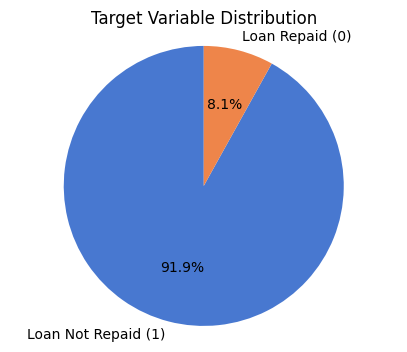

In [192]:
# Count the values of the TARGET variable
temp = application_train_df["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

# Plotting a pie chart using seaborn and matplotlib
plt.figure(figsize=(5, 4))
plt.pie(df['values'], labels=['Loan Not Repaid (1)', 'Loan Repaid (0)'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('muted'))
plt.title('Target Variable Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

Comment on Distribution of the Target Variable:



## 5.2 Distribution of Catigorical Values

### 5.2.1 Distribution NAME_EDUCATION_TYPE

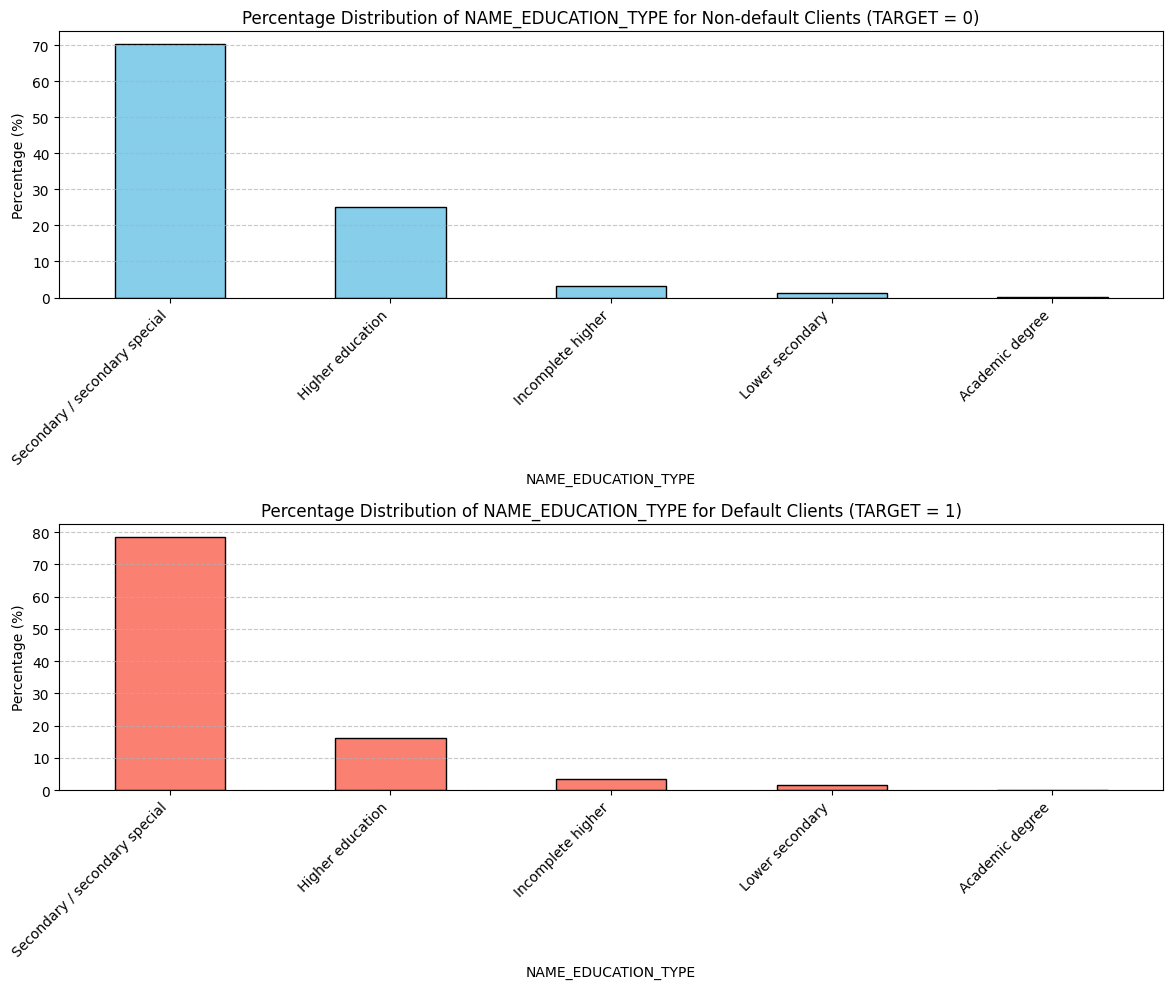

In [207]:
import pandas as pd
import matplotlib.pyplot as plt


# Variable: NAME_EDUCATION_TYPE
plt.figure(figsize=(12, 10))

# Count the number of clients for each category and target value
var_target_0 = application_train_df[application_train_df['TARGET'] == 0]['NAME_EDUCATION_TYPE'].value_counts()
var_target_1 = application_train_df[application_train_df['TARGET'] == 1]['NAME_EDUCATION_TYPE'].value_counts()

# Calculate the percentage of clients for each category
var_target_0_percent = (var_target_0 / var_target_0.sum()) * 100
var_target_1_percent = (var_target_1 / var_target_1.sum()) * 100

# Subplot for TARGET = 0 (Non-default clients)
plt.subplot(2, 1, 1)
var_target_0_percent.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage Distribution of NAME_EDUCATION_TYPE for Non-default Clients (TARGET = 0)')
plt.xlabel('NAME_EDUCATION_TYPE')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot for TARGET = 1 (Default clients)
plt.subplot(2, 1, 2)
var_target_1_percent.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Percentage Distribution of NAME_EDUCATION_TYPE for Default Clients (TARGET = 1)')
plt.xlabel('NAME_EDUCATION_TYPE')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Comment on Distribution:**
- There are differences in both the 'Incomplete higher' and 'Secondary/Secondary Special' variables. 
- This could potentially be a good predictor because of catigorical variables strength in a model.

### 5.2.2 

## 5.3 Data Exploration of Numeric Variables

### 5.3.1 Distribution of REGION_POPULATION_RELAVTIVE Variable

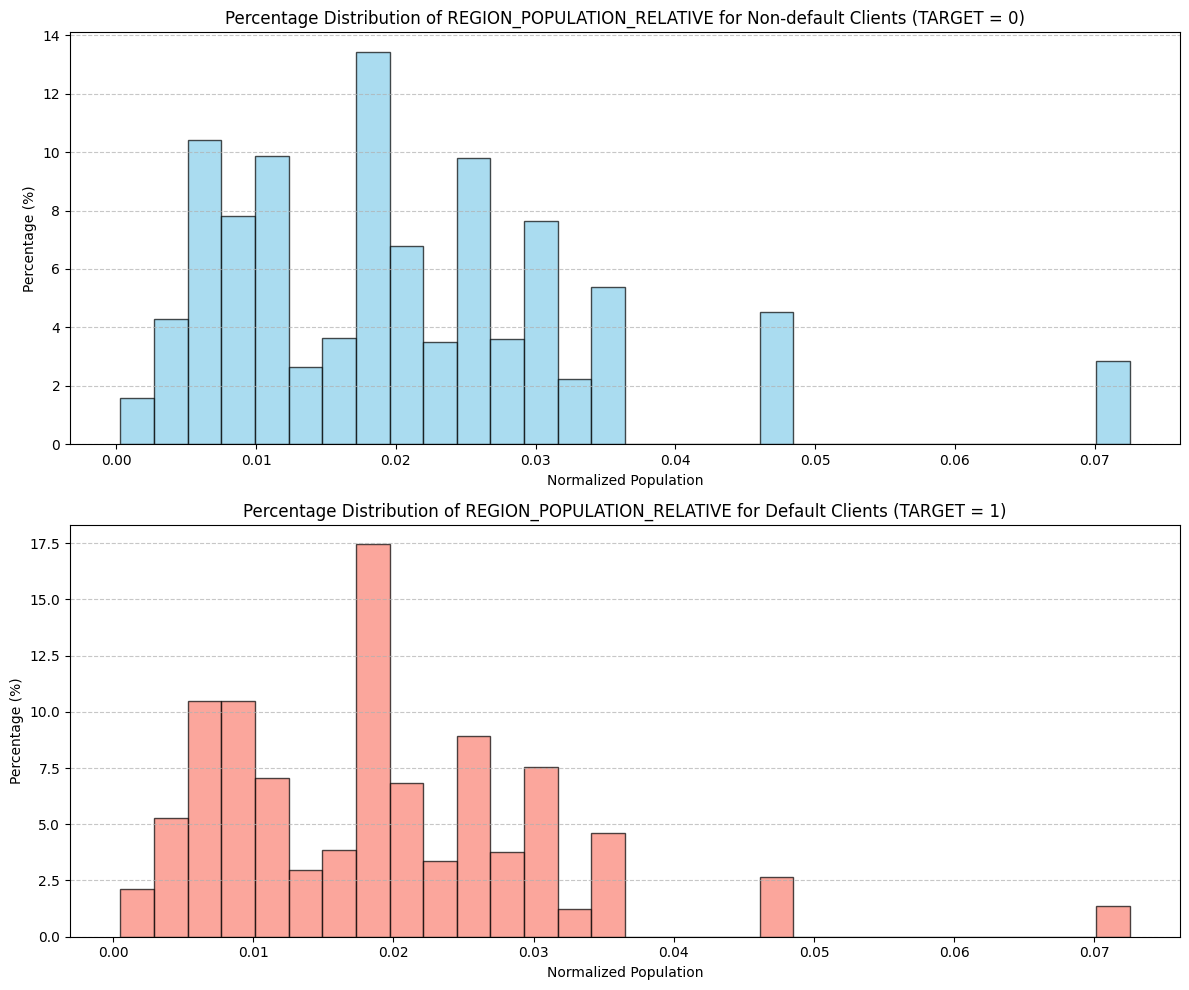

In [203]:
# Variable: REGION_POPULATION_RELATIVE by percentage
plt.figure(figsize=(12, 10))

# Create histograms to show the percentage distribution of REGION_POPULATION_RELATIVE for each target value
# Calculating percentage for non-default clients (TARGET = 0)
region_pop_target_0_percent, bins_0 = np.histogram(region_pop_target_0, bins=30)
region_pop_target_0_percent = (region_pop_target_0_percent / region_pop_target_0.shape[0]) * 100

# Calculating percentage for default clients (TARGET = 1)
region_pop_target_1_percent, bins_1 = np.histogram(region_pop_target_1, bins=30)
region_pop_target_1_percent = (region_pop_target_1_percent / region_pop_target_1.shape[0]) * 100

# Subplot for TARGET = 0 (Non-default clients)
plt.subplot(2, 1, 1)
plt.bar(bins_0[:-1], region_pop_target_0_percent, width=np.diff(bins_0), color='skyblue', edgecolor='black', alpha=0.7, align='edge')
plt.title('Percentage Distribution of REGION_POPULATION_RELATIVE for Non-default Clients (TARGET = 0)')
plt.xlabel('Normalized Population')
plt.ylabel('Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot for TARGET = 1 (Default clients)
plt.subplot(2, 1, 2)
plt.bar(bins_1[:-1], region_pop_target_1_percent, width=np.diff(bins_1), color='salmon', edgecolor='black', alpha=0.7, align='edge')
plt.title('Percentage Distribution of REGION_POPULATION_RELATIVE for Default Clients (TARGET = 1)')
plt.xlabel('Normalized Population')
plt.ylabel('Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Comment on variable distribution:
- Target variable 0 is more spread out while target variable 0 is more consolodated to 0.2.
- Normalized population does not show an obvious relationship with the target variable, though it does show differences in the two groups. 
- 


### 5.3.2 Distribution of EXT_SOURCE Variable

Comment on Reasoning for Exploation:
- The external source variables provide a normalized score of default probability.
- The external source 2 variable contains almost no missing data while the external source 1 and 3 variables contain a lot of missing data.

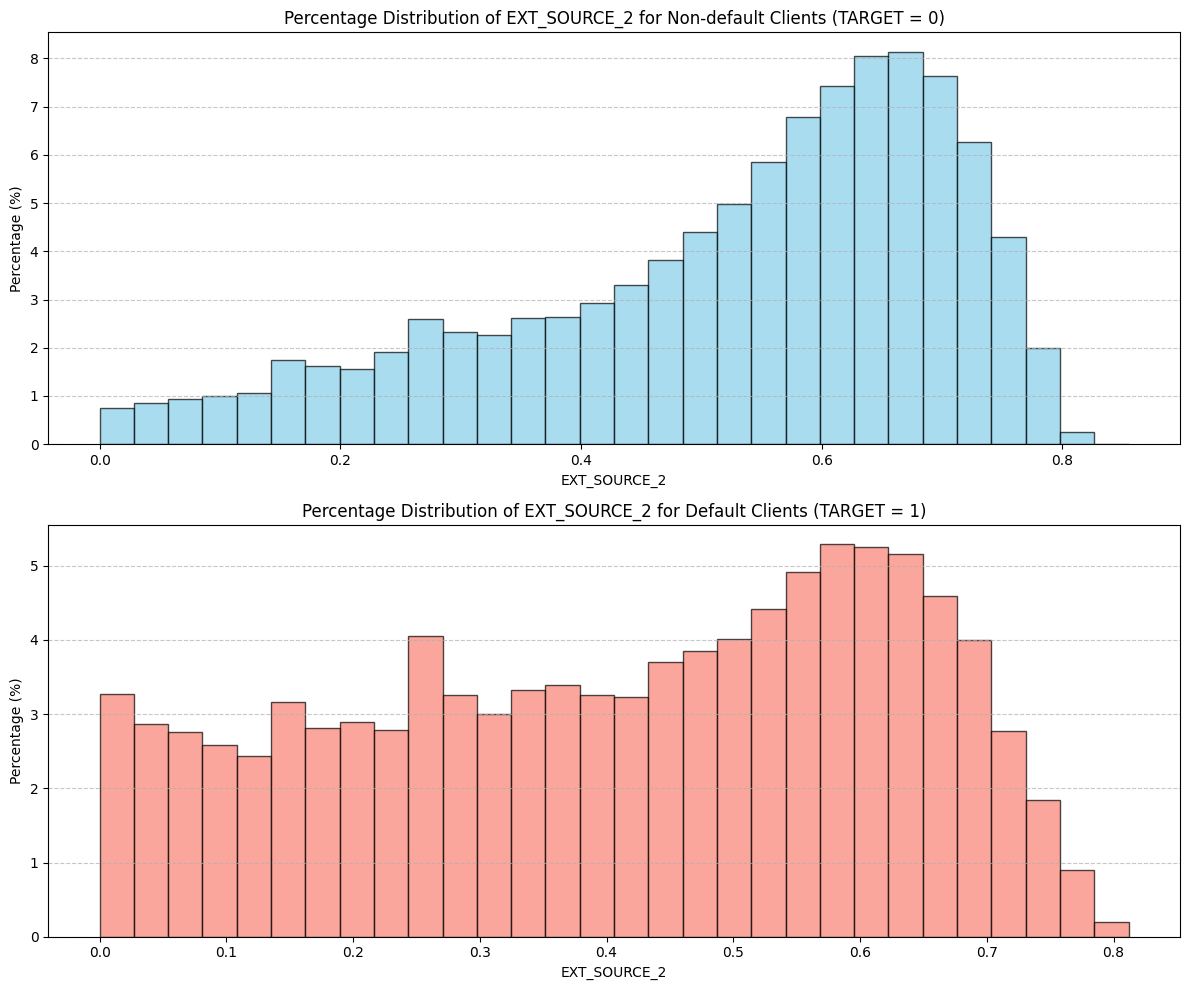

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Variable: EXT_SOURCE_2 by percentage
plt.figure(figsize=(12, 10))

# Extract data for non-default (TARGET = 0) and default (TARGET = 1) clients
ext_source_2_target_0 = application_train_df[application_train_df['TARGET'] == 0]['EXT_SOURCE_2']
ext_source_2_target_1 = application_train_df[application_train_df['TARGET'] == 1]['EXT_SOURCE_2']

# Calculate histogram counts and convert them to percentage for non-default clients (TARGET = 0)
ext_source_2_target_0_counts, bins_0 = np.histogram(ext_source_2_target_0.dropna(), bins=30)
ext_source_2_target_0_percent = (ext_source_2_target_0_counts / len(ext_source_2_target_0.dropna())) * 100

# Calculate histogram counts and convert them to percentage for default clients (TARGET = 1)
ext_source_2_target_1_counts, bins_1 = np.histogram(ext_source_2_target_1.dropna(), bins=30)
ext_source_2_target_1_percent = (ext_source_2_target_1_counts / len(ext_source_2_target_1.dropna())) * 100

# Subplot for TARGET = 0 (Non-default clients)
plt.subplot(2, 1, 1)
plt.bar(bins_0[:-1], ext_source_2_target_0_percent, width=np.diff(bins_0), color='skyblue', edgecolor='black', alpha=0.7, align='edge')
plt.title('Percentage Distribution of EXT_SOURCE_2 for Non-default Clients (TARGET = 0)')
plt.xlabel('EXT_SOURCE_2')
plt.ylabel('Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot for TARGET = 1 (Default clients)
plt.subplot(2, 1, 2)
plt.bar(bins_1[:-1], ext_source_2_target_1_percent, width=np.diff(bins_1), color='salmon', edgecolor='black', alpha=0.7, align='edge')
plt.title('Percentage Distribution of EXT_SOURCE_2 for Default Clients (TARGET = 1)')
plt.xlabel('EXT_SOURCE_2')
plt.ylabel('Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



Comment:
- The distribution of the client being likely to default is spread more evenly on the X-Axis between 0 and 0.5 while the distribution of the target variable 0 is more consolodated to 0.5 - 0.7 scores. 
- People who are more likely to default have a higher chance of having a lower EXTE_SOURCE_2 score. 
- This is the external score with the lowest number of missing values, with a relationship like this it could potentially be used to impute data to EXTERNAL_SOURCE_1 or 3.

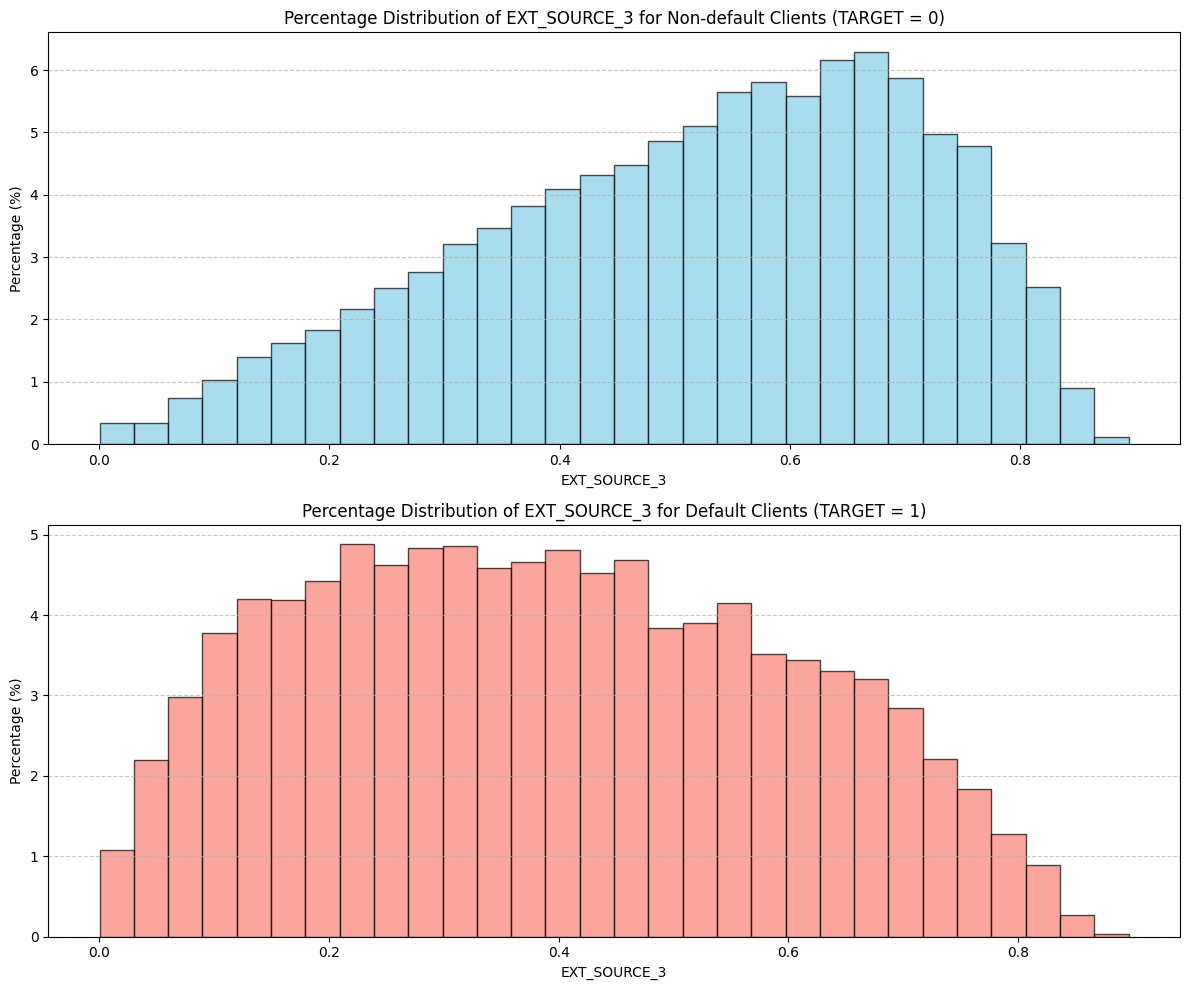

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Variable: EXT_SOURCE_3 by percentage
plt.figure(figsize=(12, 10))

# Extract data for non-default (TARGET = 0) and default (TARGET = 1) clients
ext_source_3_target_0 = application_train_df[application_train_df['TARGET'] == 0]['EXT_SOURCE_3']
ext_source_3_target_1 = application_train_df[application_train_df['TARGET'] == 1]['EXT_SOURCE_3']

# Calculate histogram counts and convert them to percentage for non-default clients (TARGET = 0)
ext_source_3_target_0_counts, bins_0 = np.histogram(ext_source_3_target_0.dropna(), bins=30)
ext_source_3_target_0_percent = (ext_source_3_target_0_counts / len(ext_source_3_target_0.dropna())) * 100

# Calculate histogram counts and convert them to percentage for default clients (TARGET = 1)
ext_source_3_target_1_counts, bins_1 = np.histogram(ext_source_3_target_1.dropna(), bins=30)
ext_source_3_target_1_percent = (ext_source_3_target_1_counts / len(ext_source_3_target_1.dropna())) * 100

# Subplot for TARGET = 0 (Non-default clients)
plt.subplot(2, 1, 1)
plt.bar(bins_0[:-1], ext_source_3_target_0_percent, width=np.diff(bins_0), color='skyblue', edgecolor='black', alpha=0.7, align='edge')
plt.title('Percentage Distribution of EXT_SOURCE_3 for Non-default Clients (TARGET = 0)')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot for TARGET = 1 (Default clients)
plt.subplot(2, 1, 2)
plt.bar(bins_1[:-1], ext_source_3_target_1_percent, width=np.diff(bins_1), color='salmon', edgecolor='black', alpha=0.7, align='edge')
plt.title('Percentage Distribution of EXT_SOURCE_3 for Default Clients (TARGET = 1)')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



Comment on Visual:
- External Source 3 models an inverse relationship when comparing the Target variable. 
- During data cleaning, data could be imputed from EXT_SOURCE_1 to make this variable a stronger predictor.
- I visualized External Source 3 because it has 19% missing data compared to 56% in External Source 1. Potential for imputation is higher for this variable.
- Does External Source 1 have any relation to External Source 3?

### 5.3.3

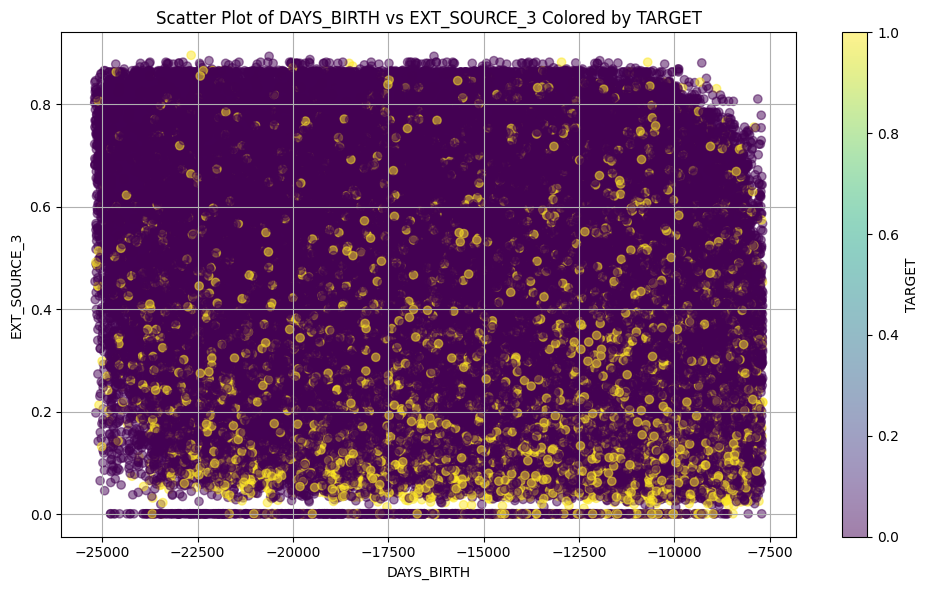

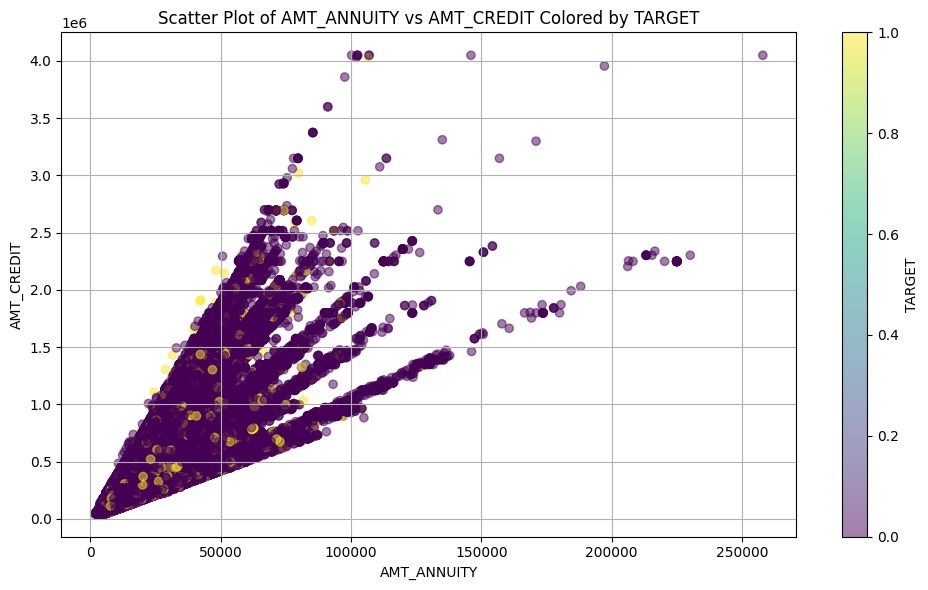

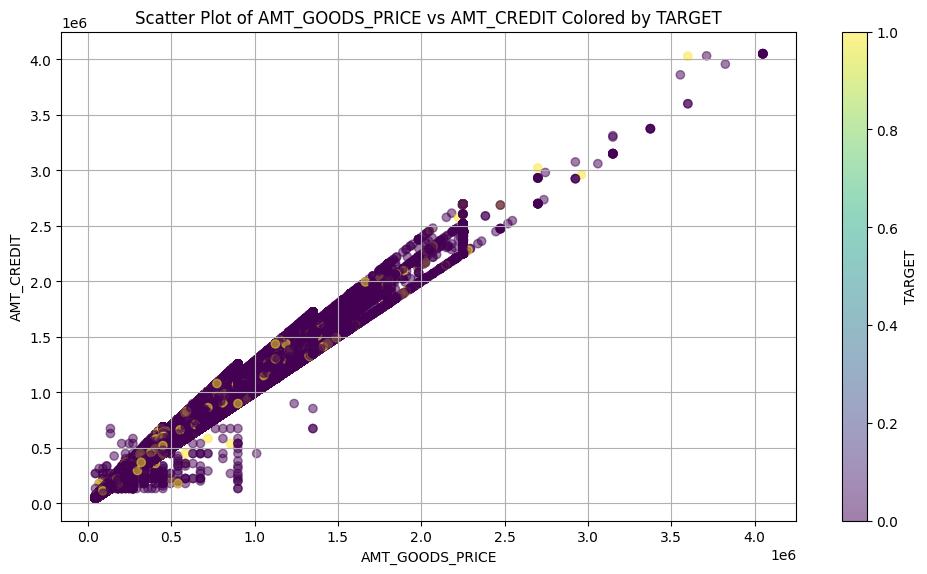

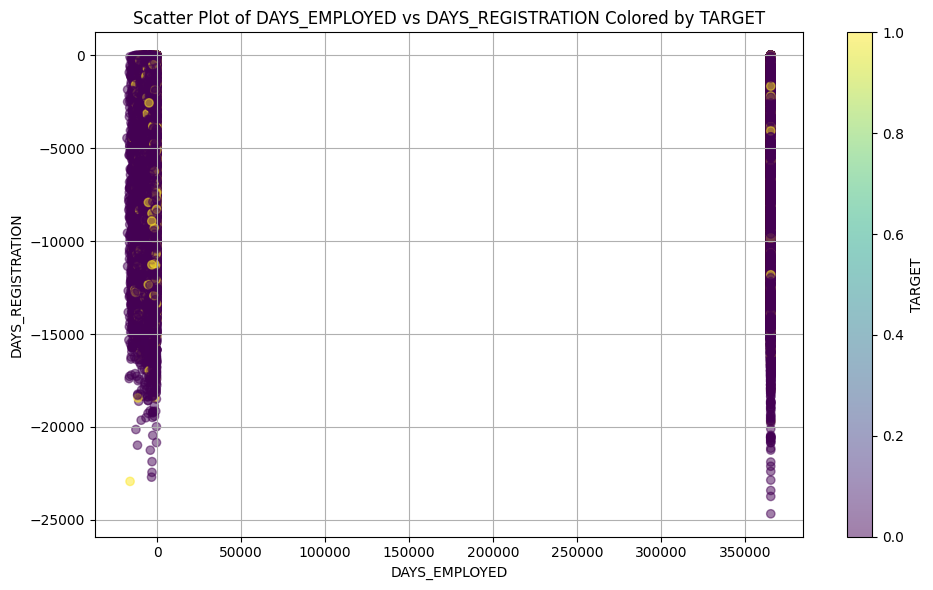

In [234]:
import pandas as pd
import matplotlib.pyplot as plt

# Select different numerical variables to model against each other and compare with the target variable
variables_to_compare = [
    ('DAYS_BIRTH', 'EXT_SOURCE_3'),        # Comparing client's age with external score 3
    ('AMT_ANNUITY', 'AMT_CREDIT'),         # Comparing annuity amount with credit amount
    ('AMT_GOODS_PRICE', 'AMT_CREDIT'),     # Comparing goods price with credit amount
    ('DAYS_EMPLOYED', 'DAYS_REGISTRATION') # Comparing employment duration with registration duration
]

# Loop through the variable pairs and create scatter plots comparing them, color by TARGET
for var_pair in variables_to_compare:
    var_x, var_y = var_pair
    
    plt.figure(figsize=(10, 6))
    plt.scatter(application_train_df[var_x], application_train_df[var_y], c=application_train_df['TARGET'], cmap='viridis', alpha=0.5)
    plt.colorbar(label='TARGET')
    plt.xlabel(var_x)
    plt.ylabel(var_y)
    plt.title(f'Scatter Plot of {var_x} vs {var_y} Colored by TARGET')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# 6. Data Cleaning

### 6.2 Imputing Data

#### 6.2.1 Imputing OWN_CAR_AGE value:

Non-default Clients (TARGET = 0) - Mean: 4.10, 5th Percentile: 0.00, 95th Percentile: 19.00
Default Clients (TARGET = 1) - Mean: 4.17, 5th Percentile: 0.00, 95th Percentile: 20.00


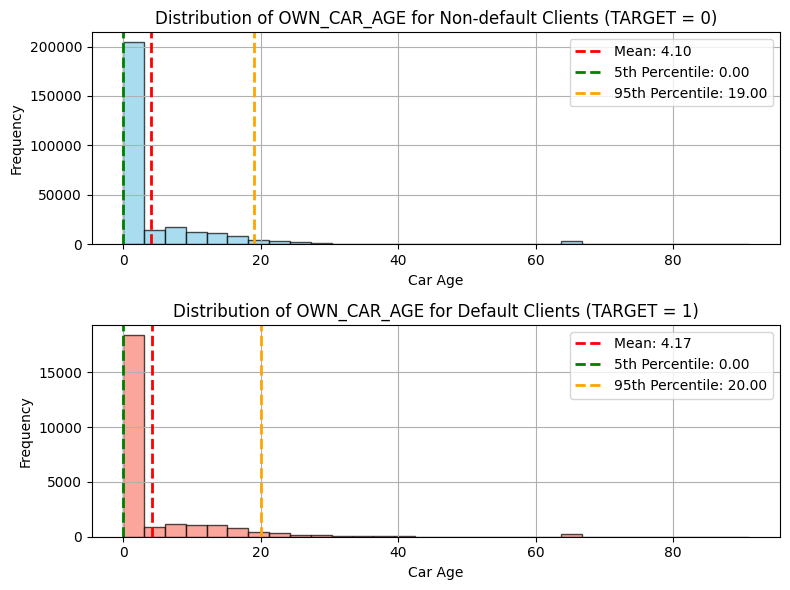

In [181]:
# Import necessary libraries
import numpy as np

# Calculate statistics for TARGET = 0 (Non-default clients)
non_default_data = application_train_df[application_train_df['TARGET'] == 0]['OWN_CAR_AGE'].dropna()
non_default_mean = non_default_data.mean()
non_default_5th = np.percentile(non_default_data, 5)
non_default_95th = np.percentile(non_default_data, 95)

# Calculate statistics for TARGET = 1 (Default clients)
default_data = application_train_df[application_train_df['TARGET'] == 1]['OWN_CAR_AGE'].dropna()
default_mean = default_data.mean()
default_5th = np.percentile(default_data, 5)
default_95th = np.percentile(default_data, 95)

# Print the statistics
print(f"Non-default Clients (TARGET = 0) - Mean: {non_default_mean:.2f}, 5th Percentile: {non_default_5th:.2f}, 95th Percentile: {non_default_95th:.2f}")
print(f"Default Clients (TARGET = 1) - Mean: {default_mean:.2f}, 5th Percentile: {default_5th:.2f}, 95th Percentile: {default_95th:.2f}")

# Plotting the distribution of OWN_CAR_AGE with mean and percentiles for each target value in two subplots
plt.figure(figsize=(8, 6))

# Subplot for target = 0 (Non-default clients)
plt.subplot(2, 1, 1)
plt.hist(non_default_data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(non_default_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {non_default_mean:.2f}')
plt.axvline(non_default_5th, color='green', linestyle='--', linewidth=2, label=f'5th Percentile: {non_default_5th:.2f}')
plt.axvline(non_default_95th, color='orange', linestyle='--', linewidth=2, label=f'95th Percentile: {non_default_95th:.2f}')
plt.title('Distribution of OWN_CAR_AGE for Non-default Clients (TARGET = 0)')
plt.xlabel('Car Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Subplot for target = 1 (Default clients)
plt.subplot(2, 1, 2)
plt.hist(default_data, bins=30, color='salmon', edgecolor='black', alpha=0.7)
plt.axvline(default_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {default_mean:.2f}')
plt.axvline(default_5th, color='green', linestyle='--', linewidth=2, label=f'5th Percentile: {default_5th:.2f}')
plt.axvline(default_95th, color='orange', linestyle='--', linewidth=2, label=f'95th Percentile: {default_95th:.2f}')
plt.title('Distribution of OWN_CAR_AGE for Default Clients (TARGET = 1)')
plt.xlabel('Car Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [155]:

# Check if the client owns a car
# For clients without a car, set OWN_CAR_AGE to 0
application_train_df.loc[application_train_df['FLAG_OWN_CAR'] == 'N', 'OWN_CAR_AGE'] = 0

# For clients with a car (FLAG_OWN_CAR == 'Y'), impute missing values with the median age
median_car_age = application_train_df.loc[application_train_df['FLAG_OWN_CAR'] == 'Y', 'OWN_CAR_AGE'].median()
application_train_df['OWN_CAR_AGE'].fillna(median_car_age, inplace=True)

# Convert the OWN_CAR_AGE column to integer
application_train_df['OWN_CAR_AGE'] = application_train_df['OWN_CAR_AGE'].astype(int)

# Displaying the count of missing values in 'FLAG_OWN_CAR' and 'OWN_CAR_AGE' columns
missing_values_count = application_train_df[['FLAG_OWN_CAR', 'OWN_CAR_AGE']].isna().sum()

# Show the number of missing values for the specified columns
missing_values_count


FLAG_OWN_CAR    0
OWN_CAR_AGE     0
dtype: int64

In [156]:
# Identifying the columns and their types in the DataFrame
column_summary = {}

# Iterate over each column and collect information about the values or range
for column in application_train_df.columns:
    if pd.api.types.is_numeric_dtype(application_train_df[column]):
        # For numeric columns, calculate the range
        col_min = application_train_df[column].min()
        col_max = application_train_df[column].max()
        column_summary[column] = f"Numeric (Range: {col_min} to {col_max})"
    else:
        # For non-numeric columns, show unique values
        unique_values = application_train_df[column].unique()
        column_summary[column] = f"Categorical (Values: {unique_values})"

# Converting the summary into a DataFrame for better readability
column_summary_df = pd.DataFrame(list(column_summary.items()), columns=['Column', 'Details'])

# Display the summary to the user
print(column_summary_df)

                           Column  \
0                      SK_ID_CURR   
1                          TARGET   
2              NAME_CONTRACT_TYPE   
3                     CODE_GENDER   
4                    FLAG_OWN_CAR   
5                 FLAG_OWN_REALTY   
6                    CNT_CHILDREN   
7                AMT_INCOME_TOTAL   
8                      AMT_CREDIT   
9                     AMT_ANNUITY   
10                AMT_GOODS_PRICE   
11                NAME_TYPE_SUITE   
12               NAME_INCOME_TYPE   
13            NAME_EDUCATION_TYPE   
14             NAME_FAMILY_STATUS   
15              NAME_HOUSING_TYPE   
16     REGION_POPULATION_RELATIVE   
17                     DAYS_BIRTH   
18                  DAYS_EMPLOYED   
19              DAYS_REGISTRATION   
20                DAYS_ID_PUBLISH   
21                    OWN_CAR_AGE   
22                     FLAG_MOBIL   
23                 FLAG_EMP_PHONE   
24                FLAG_WORK_PHONE   
25               FLAG_CONT_MOBILE   
2

##### Comments:
- Imputing the mean for people who own a car but do not have their car age listed.

- Making the car age 0 for poeple who do not own a car and have an NA value.

- This should work as a more predictive variable than `FLAG_OWNCAR`.

- If people have an old 'Classic' style car, would this trick the model into thinking they are more likely to default? Do more poeple own classic old cars or have a super old car because they cannot afford one?


Data Imputation for Housing Related Columns:

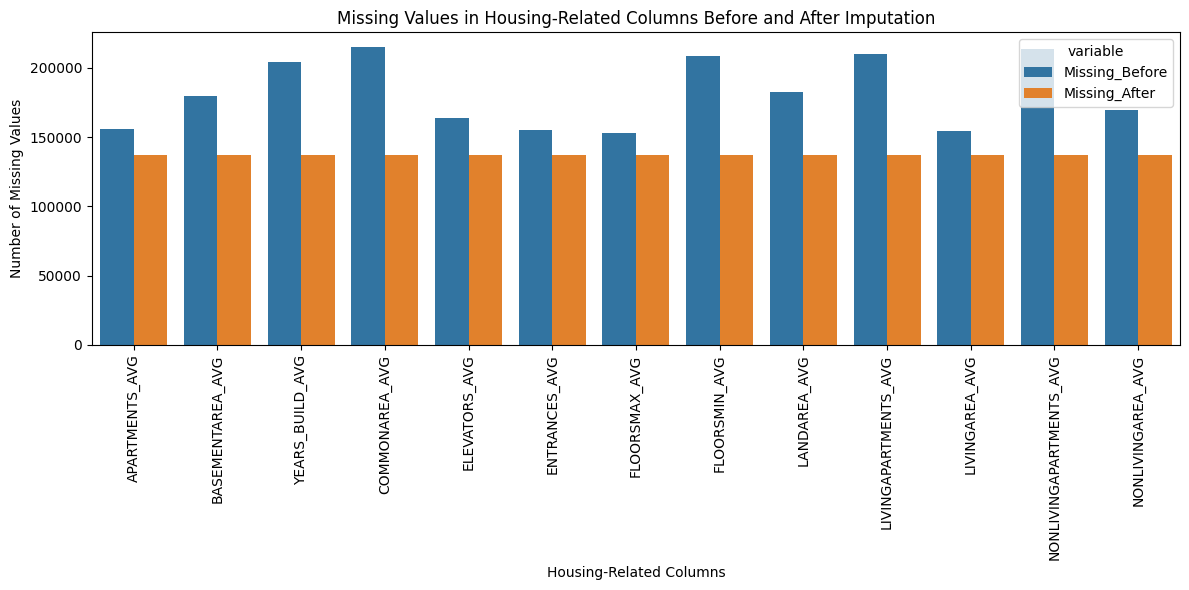

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the change in missing values for housing-related columns before and after imputation
# First, create a copy of the DataFrame with missing values for comparison
application_train_df_original = application_train_df.copy()

# Impute the missing values using the given imputation logic
application_train_df_imputed = application_train_df_original.apply(impute_housing_data, axis=1)

# Count missing values before and after imputation for housing-related columns
missing_values_before = application_train_df_original[existing_housing_columns].isna().sum()
missing_values_after = application_train_df_imputed[existing_housing_columns].isna().sum()

# Create a DataFrame to hold the missing values information
missing_comparison = pd.DataFrame({
    'Column': existing_housing_columns,
    'Missing_Before': missing_values_before,
    'Missing_After': missing_values_after
})

# Plot the missing values before and after imputation
plt.figure(figsize=(12, 6))
sns.barplot(data=missing_comparison.melt(id_vars='Column', value_vars=['Missing_Before', 'Missing_After']), 
            x='Column', y='value', hue='variable')
plt.xticks(rotation=90)
plt.title('Missing Values in Housing-Related Columns Before and After Imputation')
plt.ylabel('Number of Missing Values')
plt.xlabel('Housing-Related Columns')
plt.tight_layout()
plt.show()


Comments: 
- Identify non-owners  
  Use `NAME_HOUSING_TYPE` to determine if the applicant is a non-owner (e.g., `"Rented apartment"` or `"With parents"`).  
  <small>Non-owners likely lack data like `APARTMENTS_AVG` or `BASEMENTAREA_AVG`.</small>

- Categorical indicator for missing data  
  Impute missing values for non-owners with `0` or `"No Data"`.  
  <small>Reduces bias from imputing values relevant only to owners.</small>

- Correlation with related features  
  For owners, use `TOTALAREA_MODE` or other correlated features to impute missing values.  
  <small>Provides more informed imputation using existing correlations.</small>
  
- Fallback logic  
  If no suitable value exists, default to `0` or `"No Data"`.  
  <small>Ensures no missing values remain for modeling.</small>

How this may help in the modeling phase:
- Reduces bias, improves accuracy, and ensures no missing data issues during modeling.


**Checking for Columns in Train Data with a lot of missing values:**

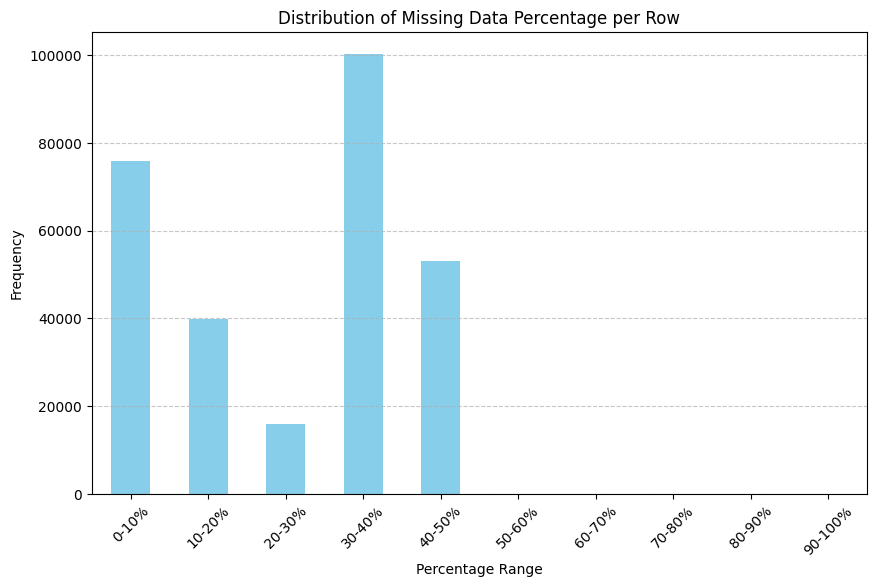

In [158]:

import matplotlib.pyplot as plt

import pandas as pd

# Calculate the percentage of missing columns for each row
missing_percentage_per_row = application_train_df.isnull().sum(axis=1) / application_train_df.shape[1] * 100

# Convert data into levels (bins)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']
data_levels = pd.cut(missing_percentage_per_row, bins=bins, labels=labels)

# Plot the distribution
plt.figure(figsize=(10, 6))
data_levels.value_counts(sort=False).plot(kind='bar', color='skyblue')
plt.title('Distribution of Missing Data Percentage per Row')
plt.xlabel('Percentage Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



- There is a large amount of the data set that has missing data, around 90,000 rows with 40-50% missing data.
- Is this missing data because of rows that can be null because they do not apply to the loan applicant?

##### **Train File Data Exploration:**


**Distribution of TARGET Variable:**

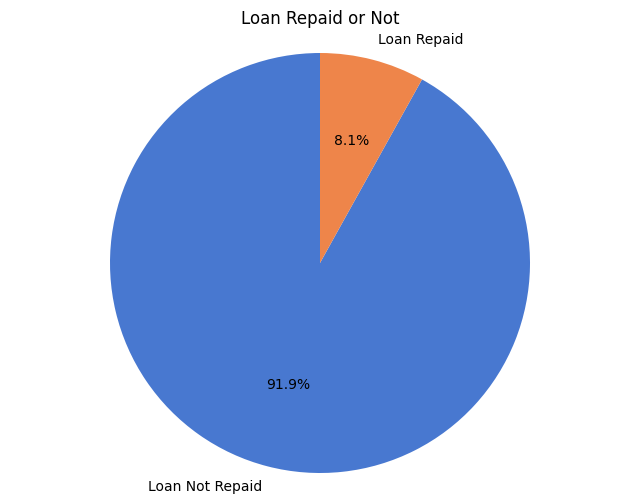

In [159]:
# Count the values of the TARGET variable
temp = application_train_df["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

# Plotting a pie chart using seaborn and matplotlib
plt.figure(figsize=(8, 6))
plt.pie(df['values'], labels=['Loan Not Repaid', 'Loan Repaid'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('muted'))
plt.title('Loan Repaid or Not')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

- The distribution of data on the target variable is very skewed.
- This needs to be considered in modeling and data exploration phases. 

**Histogram Plots of Client Data**

<u> Helper Function to Account for TARGET Variable Distribution Skew </u>

In [160]:
# Helper function to set consistent y-limits
def set_custom_ylim(g, target0_ymax):
    for ax in g.axes.flat:
        if ax.get_title().endswith('0'):
            ax.set_ylim(0, target0_ymax)
        elif ax.get_title().endswith('1'):
            ax.set_ylim(0, target0_ymax * 0.081)


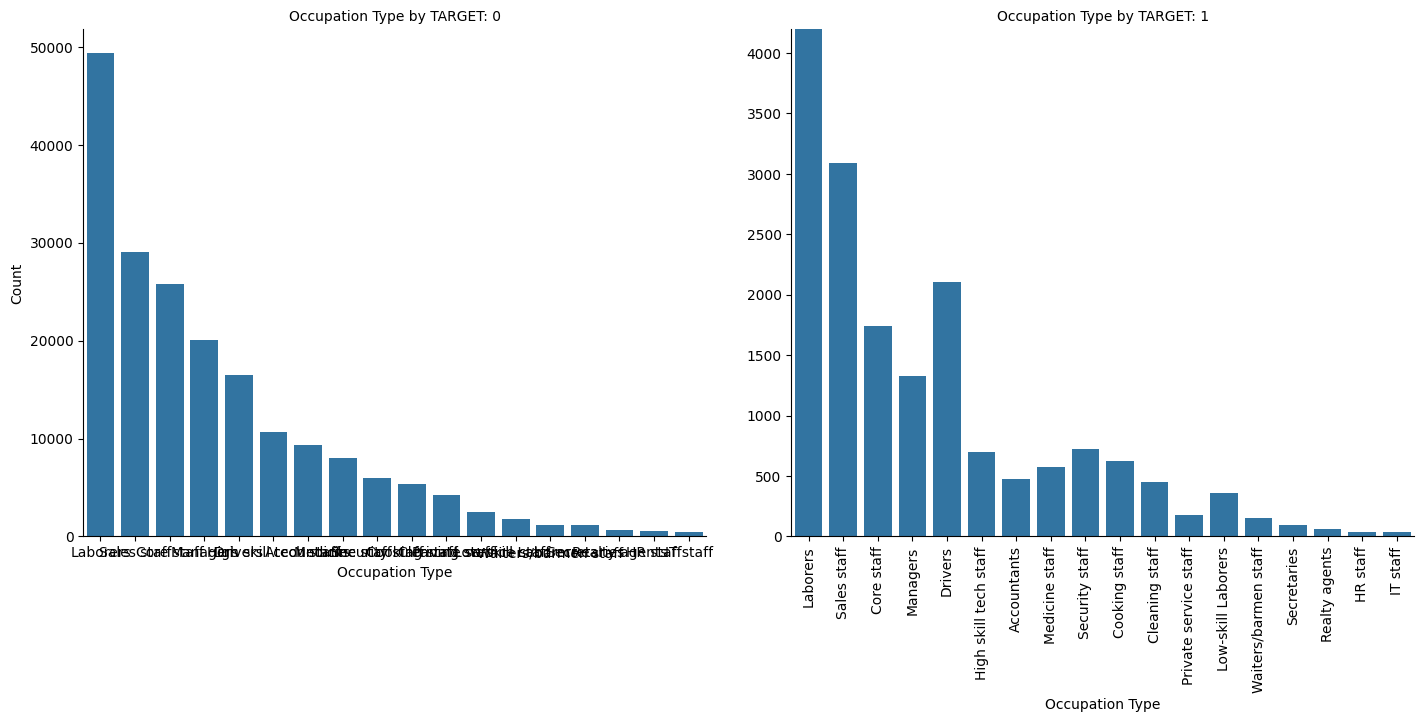

In [161]:
# Bar plot for What kind of occupation does the client have, separated by TARGET
g = sns.FacetGrid(application_train_df, col="TARGET", height=6, aspect=1.2, sharey=False)
g.map_dataframe(sns.countplot, x="OCCUPATION_TYPE", order=application_train_df["OCCUPATION_TYPE"].value_counts().index)
target0_ymax = g.axes.flat[0].get_ylim()[1]
set_custom_ylim(g, target0_ymax)
g.set_axis_labels("Occupation Type", "Count")
g.set_titles("Occupation Type by TARGET: {col_name}")
plt.xticks(rotation=90)
plt.show()

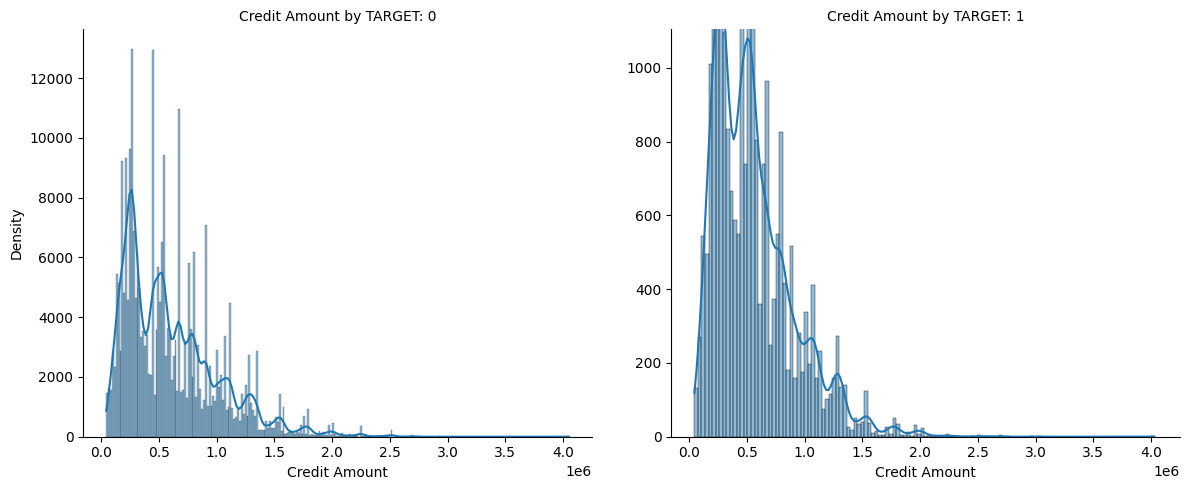

In [162]:
# Distribution of AMT_CREDIT by TARGET
g = sns.FacetGrid(application_train_df, col="TARGET", height=5, aspect=1.2, sharey=False)
g.map(sns.histplot, "AMT_CREDIT", kde=True)
target0_ymax = g.axes.flat[0].get_ylim()[1]
set_custom_ylim(g, target0_ymax)
g.set_axis_labels("Credit Amount", "Density")
g.set_titles("Credit Amount by TARGET: {col_name}")
plt.show()

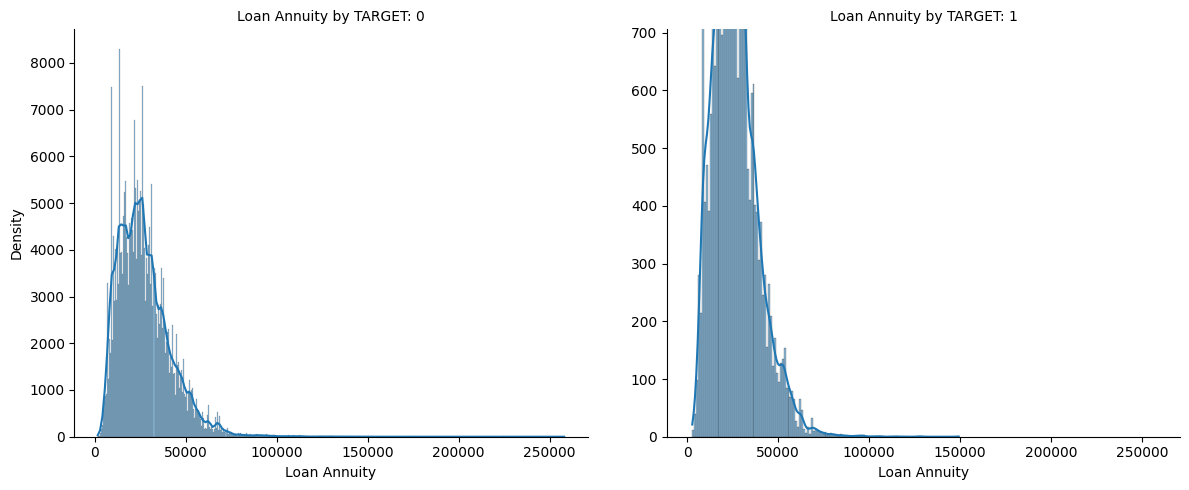

In [163]:
# Distribution of AMT_ANNUITY by TARGET
g = sns.FacetGrid(application_train_df, col="TARGET", height=5, aspect=1.2, sharey=False)
g.map(sns.histplot, "AMT_ANNUITY", kde=True)
target0_ymax = g.axes.flat[0].get_ylim()[1]
set_custom_ylim(g, target0_ymax)
g.set_axis_labels("Loan Annuity", "Density")
g.set_titles("Loan Annuity by TARGET: {col_name}")
plt.show()

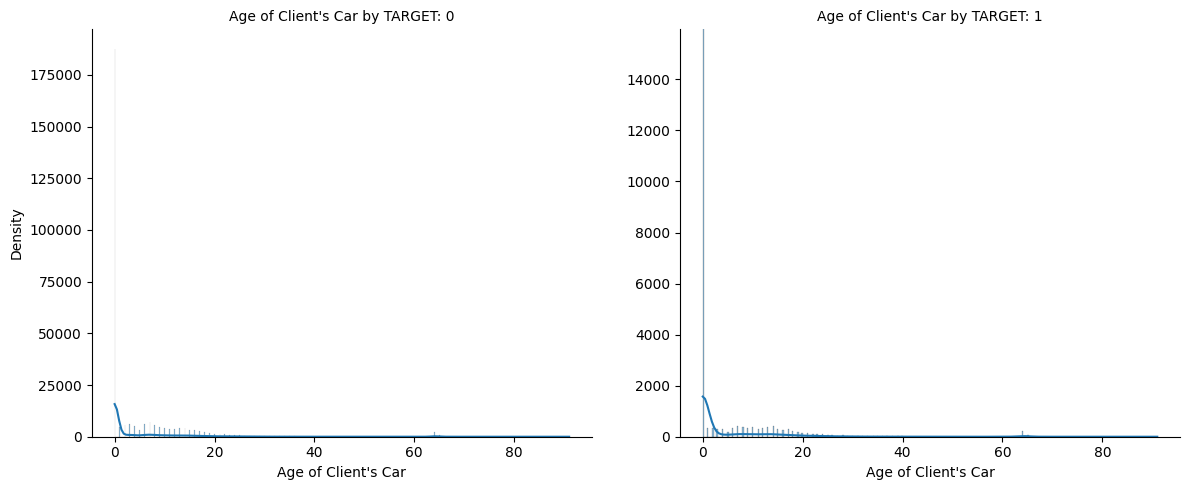

In [164]:
# Distribution of OWN_CAR_AGE (Age of client's car) by TARGET
g = sns.FacetGrid(application_train_df, col="TARGET", height=5, aspect=1.2, sharey=False)
g.map(sns.histplot, "OWN_CAR_AGE", kde=True)
target0_ymax = g.axes.flat[0].get_ylim()[1]
set_custom_ylim(g, target0_ymax)
g.set_axis_labels("Age of Client's Car", "Density")
g.set_titles("Age of Client's Car by TARGET: {col_name}")
plt.show()

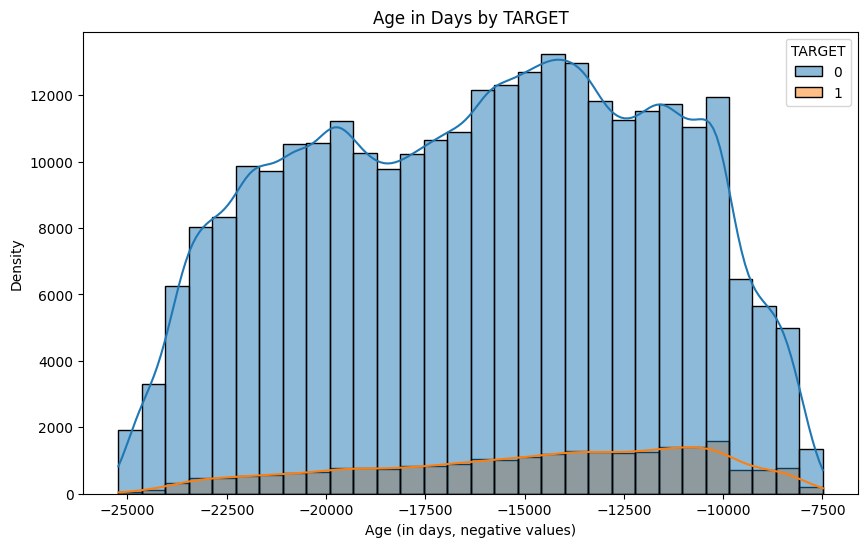

In [165]:
# 1. Distribution of DAYS_BIRTH (Age in Days, Negative Values) by TARGET
plt.figure(figsize=(10, 6))
sns.histplot(data=application_train_df, x="DAYS_BIRTH", hue="TARGET", kde=True, bins=30)
plt.title('Age in Days by TARGET')
plt.xlabel('Age (in days, negative values)')
plt.ylabel('Density')
plt.show()

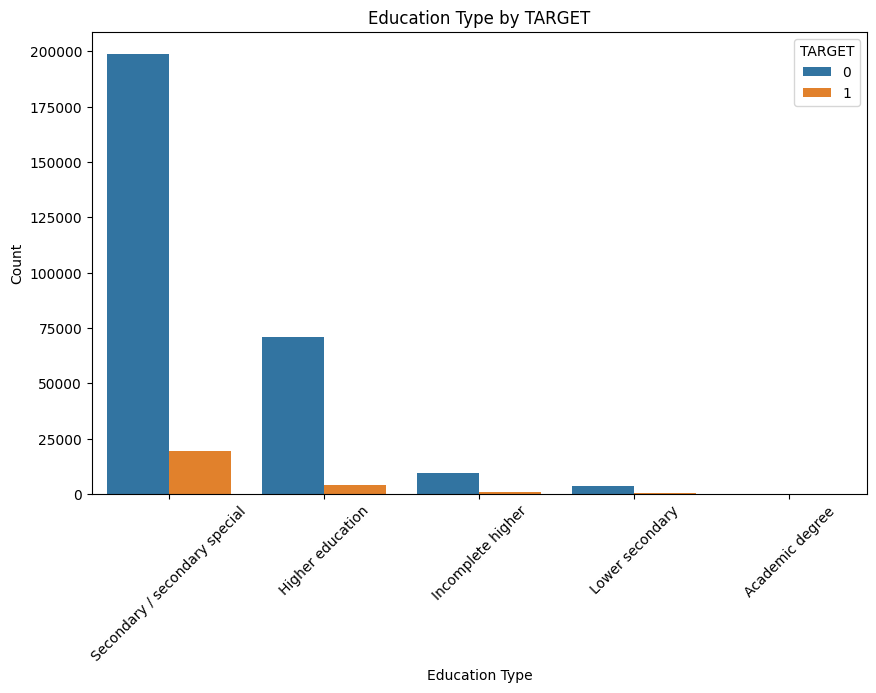

In [166]:
# 2. Bar Plot of NAME_EDUCATION_TYPE by TARGET
plt.figure(figsize=(10, 6))
sns.countplot(data=application_train_df, x="NAME_EDUCATION_TYPE", hue="TARGET", order=application_train_df["NAME_EDUCATION_TYPE"].value_counts().index)
plt.title('Education Type by TARGET')
plt.xticks(rotation=45)
plt.xlabel('Education Type')
plt.ylabel('Count')
plt.show()

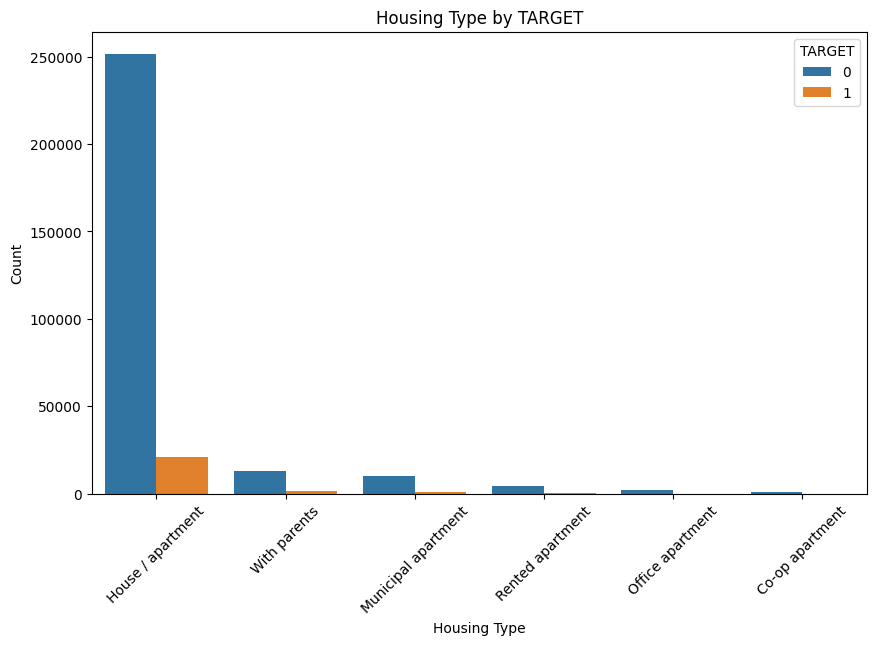

In [167]:
# 4. Bar Plot of NAME_HOUSING_TYPE by TARGET
plt.figure(figsize=(10, 6))
sns.countplot(data=application_train_df, x="NAME_HOUSING_TYPE", hue="TARGET", order=application_train_df["NAME_HOUSING_TYPE"].value_counts().index)
plt.title('Housing Type by TARGET')
plt.xticks(rotation=45)
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.show()

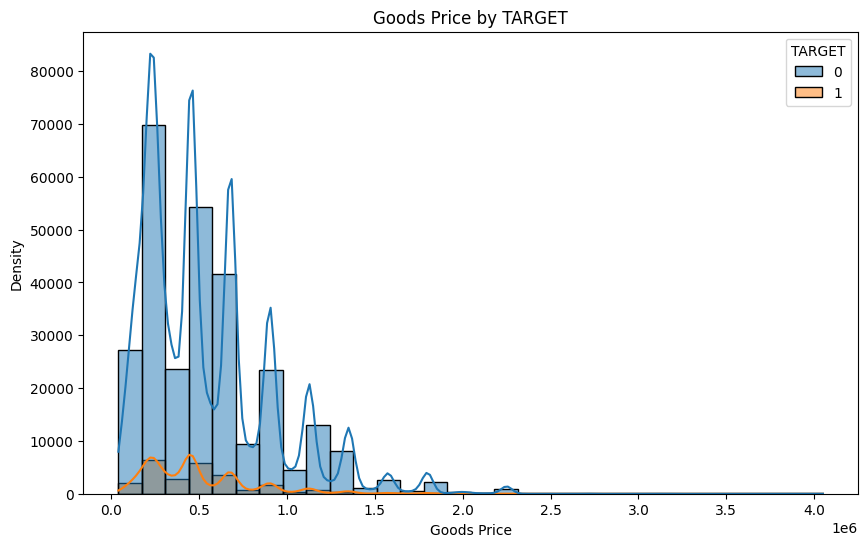

In [168]:
# 5. Distribution of AMT_GOODS_PRICE (Goods Price) by TARGET
plt.figure(figsize=(10, 6))
sns.histplot(data=application_train_df, x="AMT_GOODS_PRICE", hue="TARGET", kde=True, bins=30)
plt.title('Goods Price by TARGET')
plt.xlabel('Goods Price')
plt.ylabel('Density')
plt.show()

##### **Previous Application File:**